# Comprehensive Pandas Assignment: Electric Vehicle Market Analysis

As a data analyst for an automotive research firm, you're tasked with analyzing the electric vehicle (EV) market using Python and Pandas. Your analysis will cover various aspects of EVs, including brands, models, range, pricing, sales, and manufacturing details.


## _Datasets_

You will work with the following datasets:

- **`ev_main.csv`** => Contains main EV data (Brand, Model, Range, Price, Sales)
- **`ev_efficiency.csv`** => Contains efficiency data for EV models
- **`ev_manufacturing.csv`** => Contains manufacturing locations for each brand
- **`ev_market_share.csv`** => Contains market share data for each brand from 2015 to 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## TASK TO BE COMPLETED

---
### _TASK NO. 1: INTRODUCTION TO PANDAS AND SERIES OPERATIONS_


#### _Task No. 1.1 => Create a Pandas Series containing EV brands: Tesla, Nissan, Chevrolet, BMW, Ford._

In [2]:
brand_names = ["Tesla", "Nissan", "Chevrolet", "BMW", "Ford"]
brand_names_series = pd.Series(brand_names)

brand_names_series

0        Tesla
1       Nissan
2    Chevrolet
3          BMW
4         Ford
dtype: object

#### _Task No. 1.2 => Perform basic operations like indexing and string methods on this series._

In [3]:
# Accessing specific values at different indexes
print("\nBrand at index 0`:\n")
print(brand_names_series[0])

print("\nBrand at index 3:\n")
print(brand_names_series[3])

# Performing slicing
print("\nPerforming slicing:")
print(
    "Printing only 3 brands starting with index 1 (name at the 4th index is exclusive):\n"
)
print(brand_names_series[1:4])


Brand at index 0`:

Tesla

Brand at index 3:

BMW

Performing slicing:
Printing only 3 brands starting with index 1 (name at the 4th index is exclusive):

1       Nissan
2    Chevrolet
3          BMW
dtype: object


In [4]:
"""

The default index for the series is a range from 0 to n-1, where n is the number of elements in the series.

There are 2 ways to set a custom index, 
- you can assign a list of integers to the index attribute of the series.
- make an already existing column to be the index. 

In the followig code, we will assign a list of integers from 1 to the len(n) as the index attribute of the series. """

custom_index = [i for i in range(1, len(brand_names_series) + 1)]
custom_index

""" 
The following code will mutate the original Series in place. The following change is permanent unless reverted."""
brand_names_series.index = custom_index

In [5]:
brand_names_series

1        Tesla
2       Nissan
3    Chevrolet
4          BMW
5         Ford
dtype: object

In [6]:
# Perform basic operations like indexing and string methods on this series.
print("\nBrand at index 1:\n")
print(brand_names_series[1])

print("\nBrand at index 4:\n")
print(brand_names_series[4])

print("\nPerforming slicing:")
print("Printing only the first 3 brands (name at the 4th index is exclusive):\n")
print(brand_names_series[2:5])


Brand at index 1:

Tesla

Brand at index 4:

BMW

Performing slicing:
Printing only the first 3 brands (name at the 4th index is exclusive):

3    Chevrolet
4          BMW
5         Ford
dtype: object


In [7]:
# Resetting the index
brand_names_series.reset_index(
    drop=True, inplace=True
)  # Use drop=True to discard the old index

In [8]:
brand_names_series

0        Tesla
1       Nissan
2    Chevrolet
3          BMW
4         Ford
dtype: object

In [9]:
# Using string methods
print("\nBrands in uppercase:\n")
print(brand_names_series.str.upper())

print("\nBrands with lengths:\n")
print(brand_names_series.str.len())  # Get length of each brand


Brands in uppercase:

0        TESLA
1       NISSAN
2    CHEVROLET
3          BMW
4         FORD
dtype: object

Brands with lengths:

0    5
1    6
2    9
3    3
4    4
dtype: int64


#### _Task No. 1.3 => Calculate and display the mean length of the brand names._

In [10]:
""" 
Using str.len() applies the len() function to each element of the Series, 
giving you a new Series where each element is the length of the corresponding brand name. """

mean_length = brand_names_series.str.len().mean()
print("\nMean length of brand names:", mean_length)


Mean length of brand names: 5.4


---
### _TASK N0. 2: WORKING WITH DATAFRAMES_

#### _Task No. 2.1 => Load the `ev_main.csv` into a DataFrame._

In [11]:
ev_main__df = pd.read_csv("./data/raw_files/ev_main.csv")

#### _Task No. 2.2 => Display DataFrame information. What insights can you gather?_

In [12]:
ev_main__df

,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales
0,Hyundai,F-150 Lightning,269.0,42255.781571,71.933908,224.349743,6.933665,132.367829,7.0,2020-09-01,2020-09-01,35.0
1,BMW,Air,280.0,48325.744692,57.563723,149.416424,6.142154,94.713792,5.0,2018-06-30,2018-06-30,27.0
2,Polestar,Leaf,170.0,75760.942014,77.289710,116.021236,5.928050,147.081831,NaN,2019-07-30,NaN,32.0
3,Volvo,Mach-E,NaN,51079.952545,67.389763,166.969427,3.427392,126.764127,5.0,2017-03-08,2017-03-08,75.0
4,Rivian,NaN,328.0,28326.088425,68.895442,214.476618,6.399660,66.281716,4.0,2016-12-15,2016-12-15,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Audi,ID.4,286.0,31887.911517,71.579558,106.468953,6.844470,169.498807,5.0,2017-12-05,NaN,101.0
10496,Hyundai,Silverado EV,NaN,63104.075307,83.915377,99.454572,5.204690,142.651727,5.0,2018-06-24,2018-06-24,23.0
10497,Audi,F-150 Lightning,340.0,72908.231210,74.986156,171.049976,5.000050,112.095639,5.0,2019-10-07,2019-10-07,100.0
10498,Rivian,i3,346.0,88834.356768,45.771784,55.106072,NaN,182.453445,4.0,2019-07-04,2019-07-04,95.0


In [13]:
ev_main__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             10004 non-null  object 
 1   Model             10021 non-null  object 
 2   Range             9980 non-null   float64
 3   Price             9984 non-null   float64
 4   Battery_Capacity  9953 non-null   float64
 5   Charging_Speed    9964 non-null   float64
 6   Acceleration      9978 non-null   float64
 7   Top_Speed         9979 non-null   float64
 8   Seating_Capacity  9968 non-null   float64
 9   Launch_Date       9975 non-null   object 
 10  Date              10022 non-null  object 
 11  Sales             9972 non-null   float64
dtypes: float64(8), object(4)
memory usage: 984.5+ KB


In [14]:
# Drop duplicate records and store in the same DataFrame
ev_main__df.drop_duplicates(inplace=True)

In [15]:
ev_main__df.shape

(10000, 12)

In [16]:
# Create a DataFrame with counts of missing and present values for each column
missing_present_df = pd.DataFrame(
    {
        "Missing Values": ev_main__df.isnull().sum(),
        "Present Values": ev_main__df.notnull().sum(),
    }
)

# Find minimum number of missing values across columns
min_missing = missing_present_df["Missing Values"].max()
print(f"\nMinimum number of missing values: {min_missing}")


Minimum number of missing values: 523


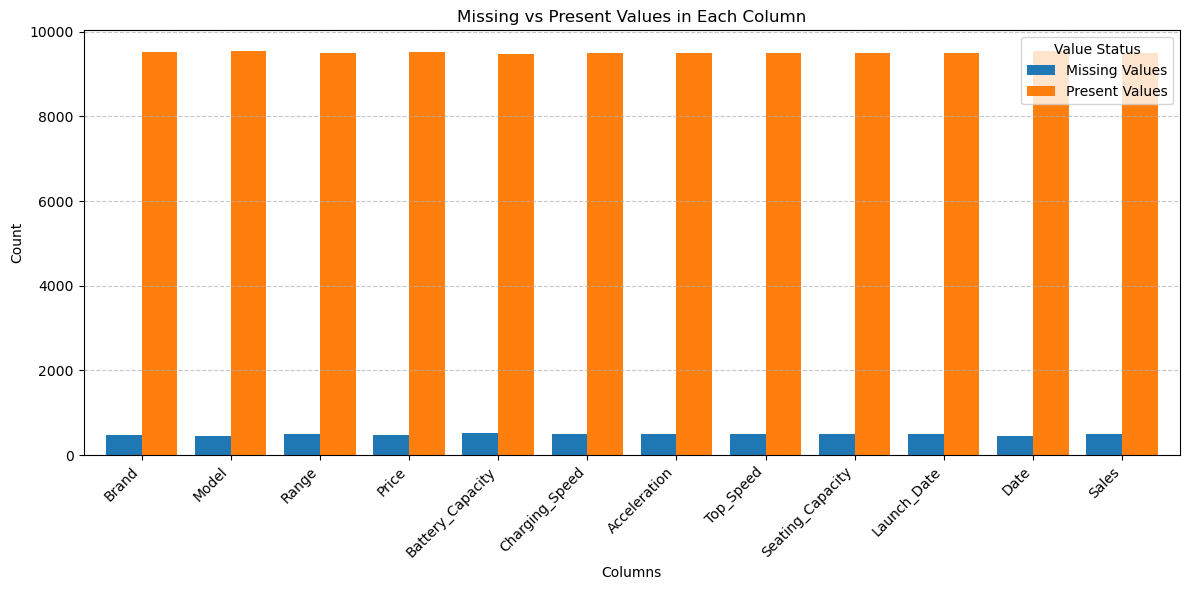

In [17]:
# Create a DataFrame with counts of missing and present values for each column
missing_present_df = pd.DataFrame(
    {
        "Missing Values": ev_main__df.isnull().sum(),
        "Present Values": ev_main__df.notnull().sum(),
    }
)

# Create a bar plot
ax = missing_present_df.plot(kind="bar", figsize=(12, 6), width=0.8)

# Customize the plot
plt.title("Missing vs Present Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Value Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# defining utility functions


def get_columns_list(df_name: pd.DataFrame):
    return list(df_name.columns)


def get_unique_values_count(df_name: pd.DataFrame, column_name: str):
    return df_name[column_name].nunique()


def get_unique_values(df_name: pd.DataFrame, column_name: str):
    return list(df_name[column_name].unique())


def get_null_count(df_name: pd.DataFrame, column_name: str):
    return df_name[column_name].isna().sum()

`ev_main__df` dataframe contains data about the electric vehicles' specifications and their sales records.

_**For this business use case, we'll be sticking to units of measurement for Indian Standards as follows:**_
- **Kilometers** for Distance
- **INR** for Currency
- **KM/H** for Speed


Prior to any data cleaning, we can see that there are 
- 1500 rows with 12 attributes
- 16 unique brands 
- 26 unique models
- Other vehicles specifications like 
    - Range: Number of KMs a vehicle can travel on a single charge
    - Price: Cost of the vehicle
    - Battery_Capacity: Total energy storage capacity of the vehicle's battery
    - Charging_Speed: Rate at which a vehicle can be charged
    - Acceleration: Rate at which a vehicle can accelerate from 0 to 100 KM/H, usually measured in seconds
    - Top_Speed: Maximum speed a vehicle can travel
    - Seating_Capacity: Number of passengers a vehicle can carry
    - Launch_Date
    - Date (Sales_Date): Date of sales record
    - Sales: Number of vehicles sold


From the above plot that shows the count of missing values vs. the count of persent values for each column, we can see that, **each of the column has approx. 4% to 5% of missing values**.

We could use the combination of Domain-Specific Knowledge and Statistics to Data Cleaning.

The technique that we'd use could be listed as folows:
- Removing Duplicates
- Impute the missing values
- Format as for better data quality
- Data Type Conversion for improved oprationality.


#### _Task No. 2.3 => Access and display the DataFrame's axes.._

In [19]:
# Display the axes (index and columns) of ev_main__df
print("Index axis:")
ev_main__df.index

Index axis:


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=10000)

In [20]:
print("Columns axis:")
ev_main__df.columns

Columns axis:


Index(['Brand', 'Model', 'Range', 'Price', 'Battery_Capacity',
       'Charging_Speed', 'Acceleration', 'Top_Speed', 'Seating_Capacity',
       'Launch_Date', 'Date', 'Sales'],
      dtype='object')

#### _Task No. 2.4 Demonstrate accessing specific values of the data._

In [21]:
# Access specific values using different methods
brand_at_first_row = ev_main__df.iloc[0]["Brand"]

print("Brand at first row:")
brand_at_first_row

Brand at first row:


'Hyundai'

In [22]:
model_at_first_row = ev_main__df.iloc[0][1]

print("Model at first row:")
model_at_first_row

Model at first row:


'F-150 Lightning'

In [23]:
model_at_second_row = ev_main__df.at[2, "Model"]

print("Model at second row:")
model_at_second_row

Model at second row:


'Leaf'

In [24]:
fifth_vehicle_price = ev_main__df.loc[4, "Price"]

print("Price of fifth vehicle:")
fifth_vehicle_price

Price of fifth vehicle:


28326.08842468308

In [25]:
second_vehicle_price_acceleration_top_speed = ev_main__df.loc[
    1, ["Price", "Acceleration", "Top_Speed"]
]

print("Price, Acceleration and Top Speed of second vehicle:")
second_vehicle_price_acceleration_top_speed

Price, Acceleration and Top Speed of second vehicle:


Price           48325.744692
Acceleration        6.142154
Top_Speed          94.713792
Name: 1, dtype: object

In [26]:
third_vehicle_range_and_battery_capacity = ev_main__df.iloc[2][
    ["Range", "Battery_Capacity"]
]

print("\nRange and Battery Capacity of 3rd vehicle:")
print(ev_main__df.iloc[2][["Range", "Battery_Capacity"]])


Range and Battery Capacity of 3rd vehicle:
Range                  170.0
Battery_Capacity    77.28971
Name: 2, dtype: object


In [27]:
print(ev_main__df.iloc[2][["Range", "Battery_Capacity"]])

Range                  170.0
Battery_Capacity    77.28971
Name: 2, dtype: object


In [28]:
# Demonstrate row slicing
print("\nFirst 5 rows:")

ev_main__df.iloc[0:5]


First 5 rows:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales
0,Hyundai,F-150 Lightning,269.0,42255.781571,71.933908,224.349743,6.933665,132.367829,7.0,2020-09-01,2020-09-01,35.0
1,BMW,Air,280.0,48325.744692,57.563723,149.416424,6.142154,94.713792,5.0,2018-06-30,2018-06-30,27.0
2,Polestar,Leaf,170.0,75760.942014,77.289710,116.021236,5.928050,147.081831,NaN,2019-07-30,NaN,32.0
3,Volvo,Mach-E,NaN,51079.952545,67.389763,166.969427,3.427392,126.764127,5.0,2017-03-08,2017-03-08,75.0
4,Rivian,NaN,328.0,28326.088425,68.895442,214.476618,6.399660,66.281716,4.0,2016-12-15,2016-12-15,100.0


In [29]:
# Demonstrate column slicing
print("\nFirst 3 columns for all rows:")

ev_main__df[["Brand", "Model", "Range"]]


First 3 columns for all rows:


,Brand,Model,Range
0,Hyundai,F-150 Lightning,269.0
1,BMW,Air,280.0
2,Polestar,Leaf,170.0
3,Volvo,Mach-E,NaN
4,Rivian,NaN,328.0
...,...,...,...
9995,Chevrolet,Q4 e-tron,310.0
9996,Tesla,Air,358.0
9997,Tesla,Air,282.0
9998,Polestar,Air,319.0


In [30]:
# Demonstrate both row and column slicing
print("\n2 to 4 rows and Brand, Model, Range columns:")

ev_main__df.loc[1:5, ["Brand", "Model", "Range"]]


2 to 4 rows and Brand, Model, Range columns:


,Brand,Model,Range
1,BMW,Air,280.0
2,Polestar,Leaf,170.0
3,Volvo,Mach-E,NaN
4,Rivian,NaN,328.0
5,Kia,Leaf,314.0


#### _Task No. 2.5 => Apply a filter to show EVs with a range over 250 miles._

In [31]:
# Filter for EVs with range > 250 miles
print("\nEVs with range over 250 miles:")
high_range_evs = ev_main__df[ev_main__df["Range"] > 250][
    ["Brand", "Model", "Range", "Price", "Battery_Capacity", "Charging_Speed"]
]
high_range_evs


EVs with range over 250 miles:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed
0,Hyundai,F-150 Lightning,269.0,42255.781571,71.933908,224.349743
1,BMW,Air,280.0,48325.744692,57.563723,149.416424
4,Rivian,NaN,328.0,28326.088425,68.895442,214.476618
5,Kia,Leaf,314.0,43621.181937,20.730910,109.255543
7,Ford,Kona,342.0,70463.709383,60.728547,55.537767
...,...,...,...,...,...,...
9995,Chevrolet,Q4 e-tron,310.0,81327.907445,111.669537,205.963745
9996,Tesla,Air,358.0,63043.942729,83.984714,193.362231
9997,Tesla,Air,282.0,30990.427415,40.792137,118.334308
9998,Polestar,Air,319.0,69684.916196,78.969581,108.017856


#### _Task No 2.6 => Calculate the average price of EVs._


In [32]:
average_price = ev_main__df["Price"].mean()

print("\nAverage price of EVs:")
print(f"{average_price:.2f}")


Average price of EVs:
60111.72


---
### _TASK NO. 3: HANDLING DUPLICATES AND `NA` VALUES_


#### _Task No. 3.1 => Check for and remove any duplicate entries based on the 'Model' column._

In [33]:
(ev_main__df[ev_main__df["Model"] == "i3"]["Brand"].unique())

array(['Volkswagen', 'BMW', 'Lucid', 'Volvo', 'Mercedes-Benz', 'Audi',
       'Hyundai', 'Chevrolet', 'Rivian', 'Tesla', 'Nissan', 'Ford',
       'Jaguar', nan, 'Polestar', 'Kia'], dtype=object)

In the above code's output, that a particular model ( _**i3**_ for example ) has multiple **16 Brands** associated with it. Meaning in our original dataset, there are multiple records for a single model. 

This case has been observed for other records as well, but with different variations in terms of number of brands associated with a single model.

As per our dataset, the _**i3** Model_ is manufactured by **16 different brands** that are 
- Volkswagen
- BMW
- Lucid
- Volvo
- Mercedes-Benz
- Audi
- Hyundai
- Chevrolet
- Rivian
- Tesla
- Nissan
- Ford
- Jaguar
- nan
- Polestar
- Kia

This is a huge discrepancy in our dataset and can affect our further analysis becasue:
- a brand can have multiple models and therefore, a model is manufactured by a single brand.
- a model **cannot** be manufactured by multiple brands. 

In [34]:
"""
To solve the above specified issue, we've defined a dictionary that maps the Models to their corresponding Brand."""

ev_brand_mapping = {
    "F-150 Lightning": "Ford",
    "Air": "Lucid",
    "Leaf": "Nissan",
    "Mach-E": "Ford",
    "XC40 Recharge": "Volvo",
    "Kona": "Hyundai",
    "Silverado EV": "Chevrolet",
    "EQS": "Mercedes-Benz",
    "R1T": "Rivian",
    "ID.Buzz": "Volkswagen",
    "Model Y": "Tesla",
    "EQE": "Mercedes-Benz",
    "EV6": "Kia",
    "I-PACE": "Jaguar",
    "e-tron": "Audi",
    "i3": "BMW",
    "2": "Tesla",
    "Niro": "Kia",
    "Ariya": "Nissan",
    "Bolt": "Chevrolet",
    "Q4 e-tron": "Audi",
    "iX": "BMW",
    "Ioniq 5": "Hyundai",
    "ID.4": "Volkswagen",
    "Model 3": "Tesla",
    "Unknown": "Unknown",
}

In [35]:
# Fill NaN values in Model column with "Unknown"
ev_main__df["Model"] = ev_main__df["Model"].fillna("Unknown")

# Map Model to Brand using ev_brand_mapping dictionary
ev_main__df["Brand"] = ev_main__df["Model"].map(ev_brand_mapping)

In [36]:
ev_main__df[ev_main__df["Model"] == "i3"]

,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales
33,BMW,i3,273.0,38319.349891,NaN,216.332533,6.993213,135.581033,4.0,2018-09-11,2018-09-11,95.0
52,BMW,i3,335.0,96915.081972,86.675410,125.613213,4.075355,198.374359,4.0,2022-11-25,2022-11-25,53.0
99,BMW,i3,342.0,71817.066601,72.290333,109.374317,5.857838,160.948771,5.0,2017-03-07,2017-03-07,90.0
105,BMW,i3,344.0,NaN,72.650874,48.689243,3.598258,121.477819,7.0,NaN,2022-04-10,135.0
112,BMW,i3,269.0,48501.744157,65.908721,NaN,6.390127,116.190080,5.0,2016-07-12,2016-07-12,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,BMW,i3,340.0,49062.743667,64.223718,134.906475,5.577353,88.640374,5.0,2022-10-21,2022-10-21,172.0
9878,BMW,i3,317.0,46063.291188,95.061456,131.792512,5.744408,106.278514,7.0,2016-05-08,2016-05-08,26.0
9939,BMW,i3,272.0,64401.179498,67.225897,179.601020,5.858209,129.538566,7.0,2021-04-19,2021-04-19,140.0
9950,BMW,i3,365.0,89193.568207,70.587841,189.416856,4.807430,148.306606,5.0,2020-03-16,2020-03-16,126.0


In [37]:
ev_main__df[ev_main__df["Model"] == "Unknown"].shape[0]

456

In [38]:
# Group by Model and check for exact duplicates
duplicates = ev_main__df.groupby("Model").apply(lambda x: x.duplicated().any())

# Remove exact duplicates within each Model group
ev_main__df = ev_main__df.drop_duplicates()

In the above code, we've tried to remove the duplicate records by grouping the records by the "Model" column and then checking for exact duplicates within each group.

If there are no exact duplicates within a group, then the group is retained in the dataset.Since there are no exact duplicates within a group, the entire group is retained in the dataset.

On the contrary we can elimiate the record that have "Unknown" as their Model and as their Brand is "Unknown" as well, they'd offer little to no value to our analysis.

In [39]:
# Drop records where Model is "Unknown"
ev_main__df = ev_main__df[ev_main__df["Model"] != "Unknown"]

#### _Task No. 3.2 => Identify NA values in the DataFrame. How many are there and in which columns?._

In [40]:
# Check for NA values in each column
na_counts = ev_main__df.isna().sum()

# Display columns with NA values and their counts
print("Number of NA values in each column:")
print(na_counts[na_counts > 0])

# Calculate total number of NA values
total_na = ev_main__df.isna().sum().sum()
print(f"\nTotal number of NA values in dataset: {total_na}")

Number of NA values in each column:
Range               478
Price               461
Battery_Capacity    500
Charging_Speed      471
Acceleration        465
Top_Speed           468
Seating_Capacity    483
Launch_Date         480
Date                423
Sales               488
dtype: int64

Total number of NA values in dataset: 4717


#### _Task No. 3.3 => Fill NA values in the Sales column with the median of the column._

In [41]:
# Fill NA values in Sales column with median by Model group

print("\nNA values in Sales column before filling:")
print(ev_main__df["Sales"].isna().sum())

# Group by Model and fill NA values with group median
ev_main__df["Sales"] = ev_main__df.groupby("Model")["Sales"].transform(
    lambda x: x.fillna(x.median())
)

# If any NAs remain (from groups with all NAs), fill with overall median
overall_median = ev_main__df["Sales"].median()
ev_main__df["Sales"] = ev_main__df["Sales"].fillna(overall_median)

# Verify NA values were filled
print("\nNA values in Sales column after filling:")
print(ev_main__df["Sales"].isna().sum())


NA values in Sales column before filling:
488

NA values in Sales column after filling:
0


#### _Task No. 3.4 => For any remaining NA values, devise and implement an appropriate strategy to handle them._


In [42]:
# Check remaining NA values by column
print("Remaining NA values by column:")
print(ev_main__df.isna().sum()[ev_main__df.isna().sum() > 0])

Remaining NA values by column:
Range               478
Price               461
Battery_Capacity    500
Charging_Speed      471
Acceleration        465
Top_Speed           468
Seating_Capacity    483
Launch_Date         480
Date                423
dtype: int64


<Figure size 1200x600 with 0 Axes>

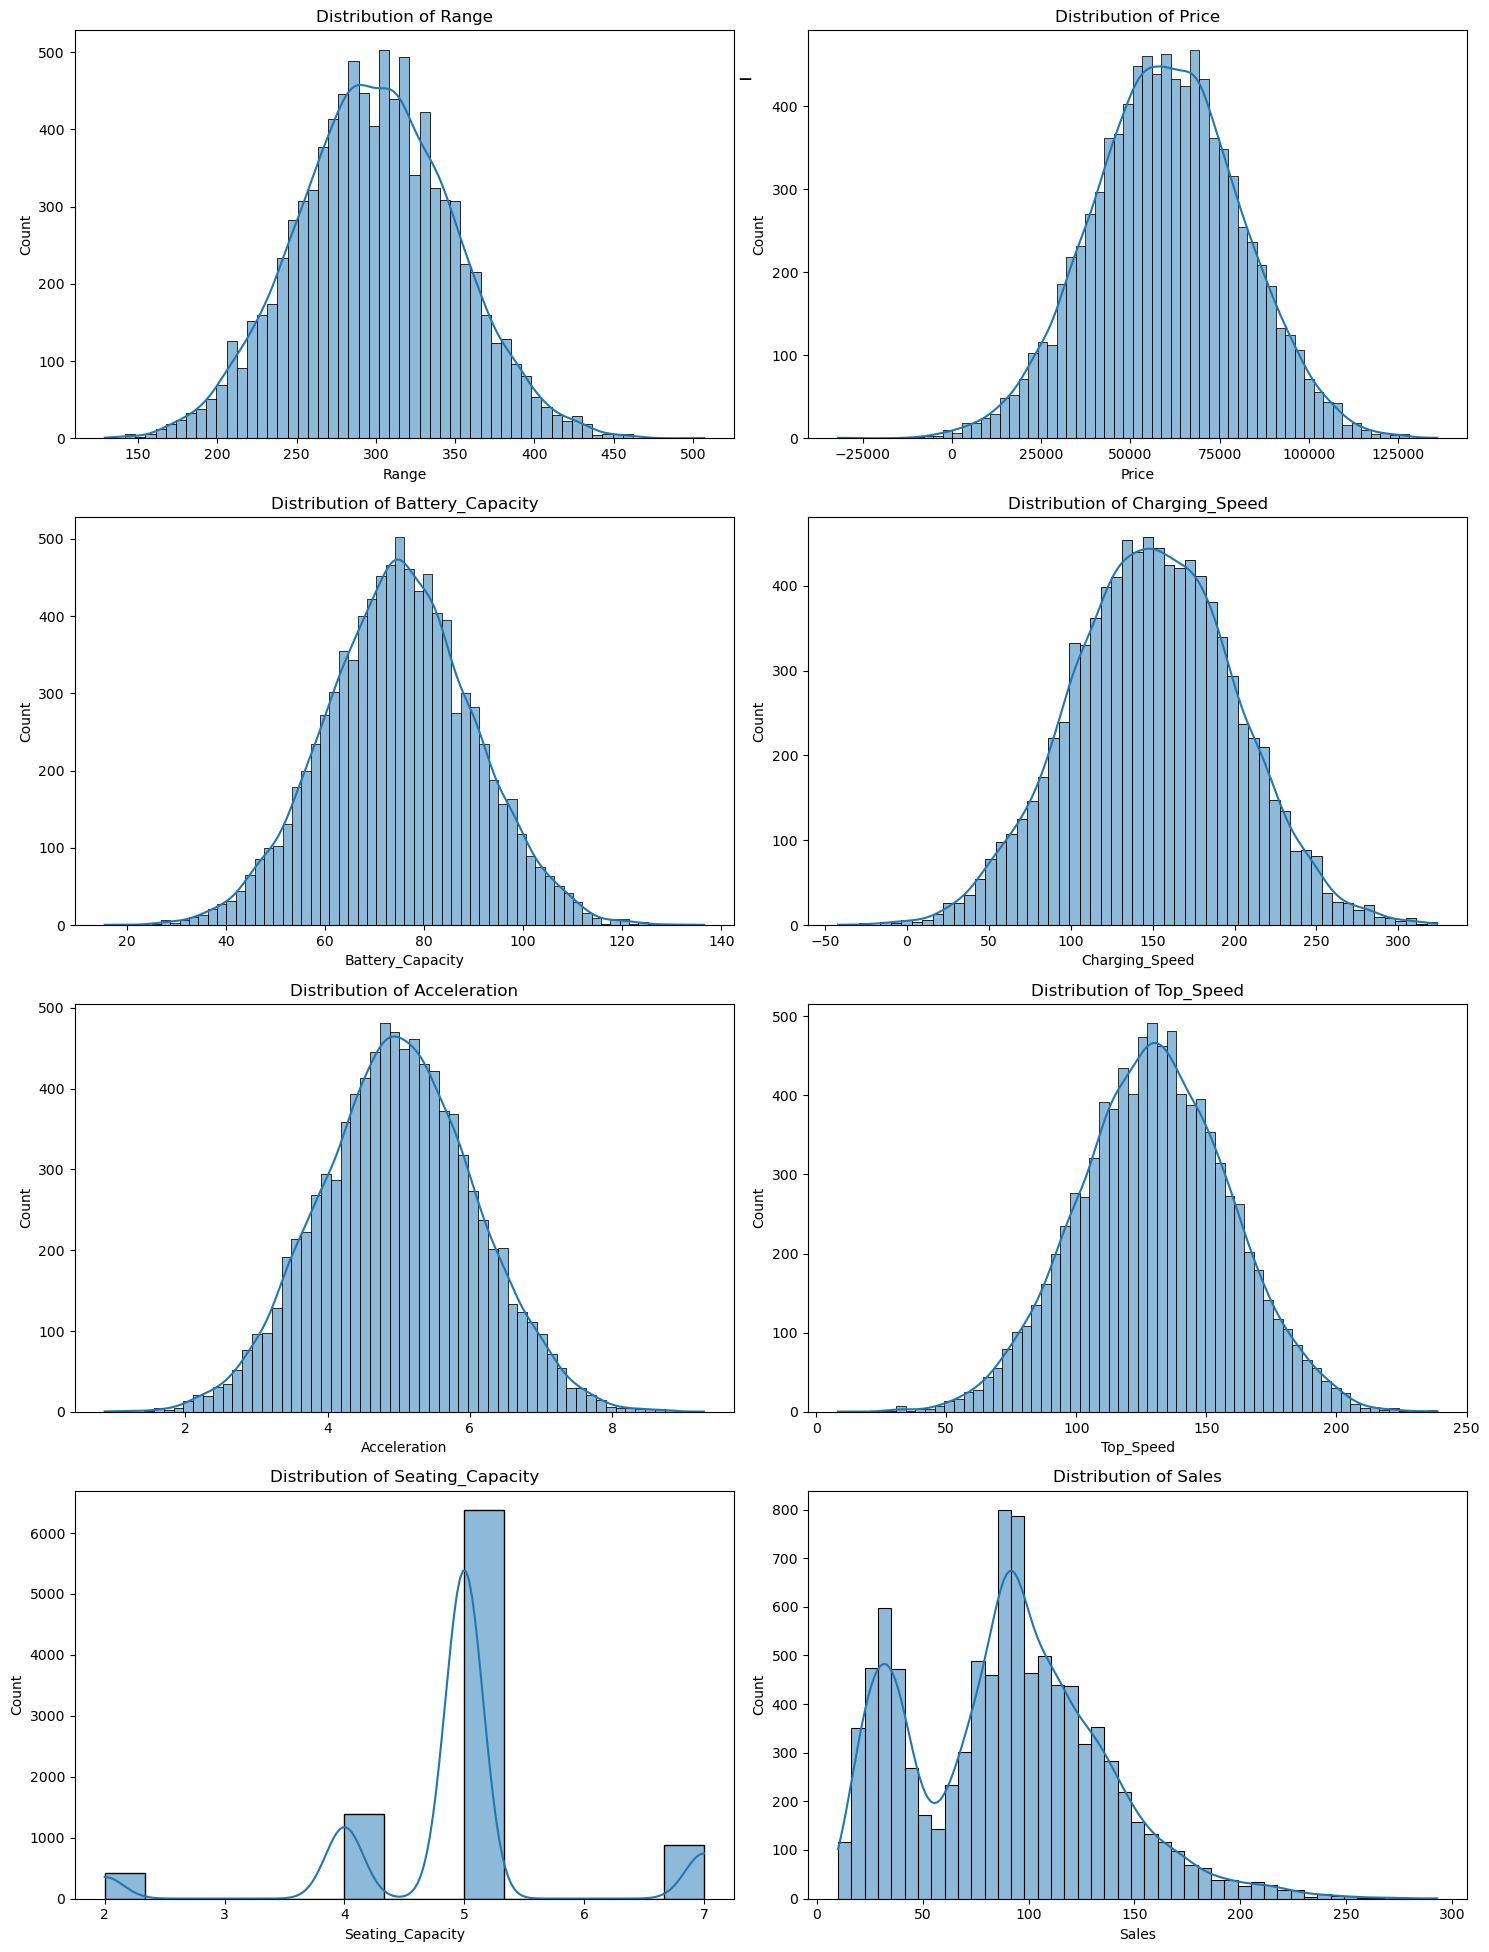

In [43]:
def display_distributions():
    # Create a figure with appropriate size
    plt.figure(figsize=(12, 6))

    # Create distribution plot for each numeric column
    numeric_columns = [
        "Range",
        "Price",
        "Battery_Capacity",
        "Charging_Speed",
        "Acceleration",
        "Top_Speed",
        "Seating_Capacity",
        "Sales",
    ]

    # Create a 4x2 subplot grid
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    fig.suptitle("_", fontsize=16, y=0.95)

    # Flatten axes array for easier iteration
    axes = axes.ravel()

    # Plot distribution for each numeric column
    for idx, col in enumerate(numeric_columns):
        # Create histogram with KDE
        sns.histplot(data=ev_main__df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f"Distribution of {col}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Count")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


display_distributions()

In [44]:
ev_main__df.describe()

,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Sales
count,9066.000000,9083.000000,9044.000000,9073.000000,9079.000000,9076.000000,9061.000000,9544.000000
mean,299.518972,60081.755022,75.086673,150.355963,4.987574,129.955251,4.901446,89.865465
std,49.623557,20854.737581,14.916498,50.281454,1.087728,29.264996,0.972865,44.955878
min,129.000000,-31852.917299,15.576306,-42.096288,0.866325,8.392719,2.000000,10.000000
25%,266.000000,46036.682527,65.073219,116.660062,4.264412,110.542108,5.000000,51.000000
50%,299.000000,60123.240987,75.008672,150.233258,4.984703,129.923579,5.000000,91.000000
75%,333.000000,74250.971591,84.900991,184.659128,5.721689,149.732898,5.000000,118.000000
max,507.000000,135964.066669,136.491755,323.761969,9.291593,238.744514,7.000000,293.000000


In [45]:
# Ensure Price and Charging_Speed are absolute
ev_main__df["Price"] = ev_main__df["Price"].abs()
ev_main__df["Price"] = ev_main__df.groupby("Model")["Price"].transform(
    lambda x: x.mean()
)
ev_main__df["Charging_Speed"] = ev_main__df["Charging_Speed"].abs()

# Define the columns to standardize
columns_to_standardize = [
    "Range",
    "Battery_Capacity",
    "Charging_Speed",
    "Acceleration",
    "Top_Speed",
]

# Group by Model and replace values with the mode
for column in columns_to_standardize:
    ev_main__df[column] = ev_main__df.groupby("Model")[column].transform(
        lambda x: x.mode()[0] if not x.mode().empty else x
    )

grouped = ev_main__df.groupby("Model")

# Fill NA values for Seating_Capacity with mode per Model
ev_main__df["Seating_Capacity"] = grouped["Seating_Capacity"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)

ev_main__df["Launch_Date"] = ev_main__df["Launch_Date"].fillna("Missing")
ev_main__df["Date"] = ev_main__df["Date"].fillna("Missing")

# Convert float columns to integer
ev_main__df["Seating_Capacity"] = ev_main__df["Seating_Capacity"].astype(int)
ev_main__df["Sales"] = ev_main__df["Sales"].astype(int)

# Format decimal places
decimal_columns = [
    "Price",
    "Battery_Capacity",
    "Charging_Speed",
    "Acceleration",
    "Top_Speed",
]
for column in decimal_columns:
    ev_main__df[column] = ev_main__df[column].round(2)

In [46]:
ev_main__df[ev_main__df["Model"] == "i3"]

,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales
33,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,4,2018-09-11,2018-09-11,95
52,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,4,2022-11-25,2022-11-25,53
99,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,5,2017-03-07,2017-03-07,90
105,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,7,Missing,2022-04-10,135
112,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,5,2016-07-12,2016-07-12,65
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,5,2022-10-21,2022-10-21,172
9878,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,7,2016-05-08,2016-05-08,26
9939,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,7,2021-04-19,2021-04-19,140
9950,BMW,i3,340.0,59324.29,37.62,2.73,2.33,32.36,5,2020-03-16,2020-03-16,126


In [47]:
# Check for NA values in each column
na_counts = ev_main__df.isna().sum()

# Display columns with NA values and their counts
print("Number of NA values in each column:")
print(na_counts[na_counts > 0])

# Calculate total number of NA values
total_na = ev_main__df.isna().sum().sum()
print(f"\nTotal number of NA values in dataset: {total_na}")

Number of NA values in each column:
Series([], dtype: int64)

Total number of NA values in dataset: 0


In [48]:
ev_main__df.to_csv("./data/cleaned_files/ev_main__cleaned.csv")

---
### _TASK NO. 4: MERGING DATAFRAMES_


#### _Task No. 4.1 => Load the `ev_efficiency.csv` and `ev_manufacturing.csv` into DataFrames._

In [49]:
ev_efficiency__df = pd.read_csv("./data/raw_files/ev_efficiency.csv")
ev_manufacturing__df = pd.read_csv("./data/raw_files/ev_manufacturing.csv")

In [50]:
"""
Format Efficiency, Drag_Coefficient, and Tire_Rolling_Resistance columns in ev_efficiency__df to 2 decimal places to ensure consistent precision and readability across the dataset. """

numeric_columns_to_format = [
    "Efficiency",
    "Drag_Coefficient",
    "Tire_Rolling_Resistance",
]

for col in numeric_columns_to_format:
    ev_efficiency__df[col] = ev_efficiency__df[col].round(2)

In [51]:
"""
Fill NaN values in Secondary_Manufacturing_Location with Primary_Manufacturing_Location in ev_manufacturing__df """

ev_manufacturing__df["Secondary_Manufacturing_Location"] = ev_manufacturing__df[
    "Secondary_Manufacturing_Location"
].fillna(ev_manufacturing__df["Primary_Manufacturing_Location"])

In [52]:
ev_efficiency__df.to_csv("./data/cleaned_files/ev_efficiency__cleaned.csv")
ev_manufacturing__df.to_csv("./data/cleaned_files/ev_manufacturing__cleaned.csv")

#### _Task No. 4.2.1 => Merge the `ev_main__df` DataFrame with the `ev_efficiency__df` DataFrame based on the 'Model' column._


In [53]:
ev_efficiency__df

,Model,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance
0,Model 3,0.35,0.27,0.01
1,Model Y,0.35,0.31,0.01
2,Leaf,0.29,0.29,0.01
3,Ariya,0.23,0.27,0.01
4,Bolt,0.36,0.34,0.01
5,Silverado EV,0.23,0.22,0.01
6,i3,0.25,0.30,0.01
7,iX,0.39,0.22,0.01
8,Mach-E,0.35,0.25,0.01
9,F-150 Lightning,0.37,0.24,0.01


In [54]:
# Merge ev_main__df with ev_efficiency__df on Model column
ev_main_merged_efficiency__df = pd.merge(
    ev_main__df, ev_efficiency__df, on="Model", how="left"
)

# Display first few rows of merged dataframe
print("First few rows of merged dataframe:")
ev_main_merged_efficiency__df.head()

First few rows of merged dataframe:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance
0,Ford,F-150 Lightning,268.0,60121.52,28.63,0.10,2.26,59.59,7,2020-09-01,2020-09-01,35,0.37,0.24,0.01
1,Lucid,Air,266.0,56169.00,36.95,1.15,2.11,49.47,5,2018-06-30,2018-06-30,27,0.37,0.31,0.01
2,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2019-07-30,Missing,32,0.29,0.29,0.01
3,Ford,Mach-E,287.0,59811.91,33.38,9.20,2.19,47.57,5,2017-03-08,2017-03-08,75,0.35,0.25,0.01
4,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2017-12-13,2017-12-13,107,0.29,0.29,0.01


In [55]:
ev_main_merged_efficiency__df.to_csv(
    "./data/cleaned_files/ev_main_merged_efficiency__cleaned.csv"
)

In [57]:
# Display shape of merged dataframe

""" 
After the merge operation, the column "Efficiency", "Drag_Coefficient", "Tire_Rolling_Resistance" from  ev_efficiency__df datafraem have been appended on the axis 1"""

print("\nShape of merged dataframe:", ev_main_merged_efficiency__df.shape)

#### _Task No. 4.2.2 => Perform a left join to merge the resulting DataFrame with the `ev_manufacturing__df` DataFrame based on the 'Brand' column._


In [56]:
# Merge ev_main_merged_efficiency__df with ev_manufacturing__df on Brand column
ev_main_merged_efficiency_merged_manufacturing__df = pd.merge(
    ev_main_merged_efficiency__df, ev_manufacturing__df, on="Brand", how="left"
)

# Display first few rows of final merged dataframe
print("First few rows of final merged dataframe:")
ev_main_merged_efficiency_merged_manufacturing__df.head()

First few rows of final merged dataframe:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance,Primary_Manufacturing_Location,Secondary_Manufacturing_Location,Annual_Production_Capacity,Year_Operations_Started
0,Ford,F-150 Lightning,268.0,60121.52,28.63,0.10,2.26,59.59,7,2020-09-01,2020-09-01,35,0.37,0.24,0.01,Japan,Sweden,300990,2015
1,Lucid,Air,266.0,56169.00,36.95,1.15,2.11,49.47,5,2018-06-30,2018-06-30,27,0.37,0.31,0.01,Germany,USA,498290,1998
2,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2019-07-30,Missing,32,0.29,0.29,0.01,South Korea,China,107624,1995
3,Ford,Mach-E,287.0,59811.91,33.38,9.20,2.19,47.57,5,2017-03-08,2017-03-08,75,0.35,0.25,0.01,Japan,Sweden,300990,2015
4,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2017-12-13,2017-12-13,107,0.29,0.29,0.01,South Korea,China,107624,1995


In [57]:
ev_main_merged_efficiency_merged_manufacturing__df.to_csv(
    "./data/cleaned_files/ev_main_merged_efficiency_merged_manufacturing__cleaned.csv"
)

#### _Task No. 4.3.1 => Split the main DataFrame (`ev_main__df`) into two based on a condition (e.g., Price > 50000)._


In [58]:
# Split ev_main__df into two dataframes based on Price > 50000

high_price_ev__df = ev_main__df[ev_main__df["Price"] > 50000]
low_price_ev__df = ev_main__df[ev_main__df["Price"] <= 50000]

In [59]:
# Display shapes of both dataframes
print("Shape of high price EV dataframe:", high_price_ev__df.shape)
print("Shape of low price EV dataframe:", low_price_ev__df.shape)

Shape of high price EV dataframe: (9544, 12)
Shape of low price EV dataframe: (0, 12)


In [60]:
# Display first few rows of both dataframes
print("\nFirst few rows of high price EV dataframe:")
high_price_ev__df.head()


First few rows of high price EV dataframe:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales
0,Ford,F-150 Lightning,268.0,60121.52,28.63,0.10,2.26,59.59,7,2020-09-01,2020-09-01,35
1,Lucid,Air,266.0,56169.00,36.95,1.15,2.11,49.47,5,2018-06-30,2018-06-30,27
2,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2019-07-30,Missing,32
3,Ford,Mach-E,287.0,59811.91,33.38,9.20,2.19,47.57,5,2017-03-08,2017-03-08,75
5,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2017-12-13,2017-12-13,107


In [61]:
print("\nFirst few rows of low price EV dataframe:")
low_price_ev__df.head()


First few rows of low price EV dataframe:


,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales


#### _Task No. 4.3.2 => Concatenate these DataFrames back together. Verify the result matches the original._


In [62]:
# Concatenate high and low price dataframes
combined_ev__df = pd.concat([high_price_ev__df, low_price_ev__df])

# Sort index to match original order
combined_ev__df = combined_ev__df.sort_index()

In [63]:
# Verify shape matches original
print(
    "Shape of original dataframe:",
    ev_main__df.shape,
)
print("Shape of combined dataframe:", combined_ev__df.shape)

Shape of original dataframe: (9544, 12)
Shape of combined dataframe: (9544, 12)


In [64]:
# Verify data matches
print("\nFirst few rows match original:")
print(combined_ev__df.equals(ev_main__df))


First few rows match original:
True


#### _Task No. 4.4.1 => Create a new column 'Efficiency_Score' that categorizes each vehicle as 'High' or 'Low' efficiency based on a threshold._


In [65]:
# Calculate median efficiency as threshold
efficiency_threshold = ev_main_merged_efficiency__df["Efficiency"].median()
efficiency_threshold

0.34

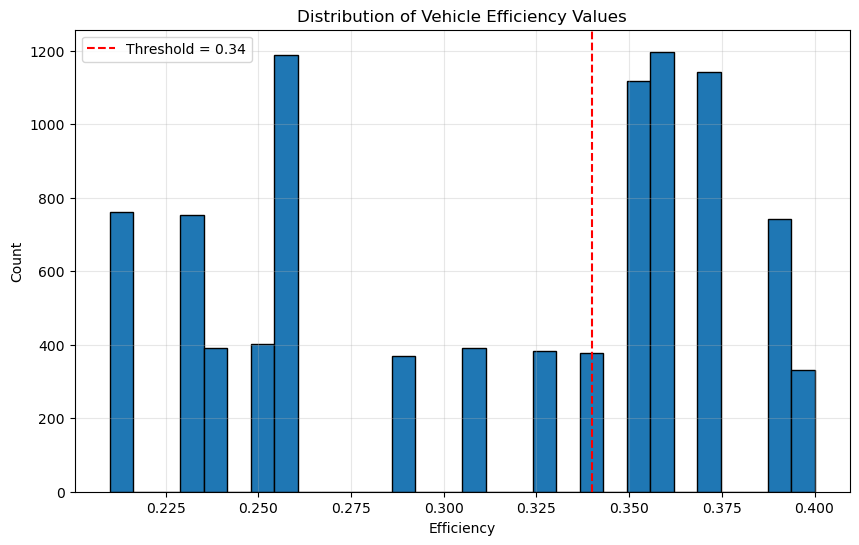

In [66]:
# Plot distribution of efficiency values with threshold line
plt.figure(figsize=(10, 6))
plt.hist(ev_main_merged_efficiency__df["Efficiency"], bins=30, edgecolor="black")
plt.axvline(
    x=efficiency_threshold,
    color="red",
    linestyle="--",
    label=f"Threshold = {efficiency_threshold:.2f}",
)
plt.title("Distribution of Vehicle Efficiency Values")
plt.xlabel("Efficiency")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [67]:
# Create Efficiency_Score column based on threshold
ev_main_merged_efficiency__df["Efficiency_Score"] = ev_main_merged_efficiency__df[
    "Efficiency"
].apply(lambda x: "High" if x >= efficiency_threshold else "Low")

In [68]:
# Display first few rows to verify new column
print("First few rows with Efficiency Score:")
ev_main_merged_efficiency__df[["Model", "Efficiency", "Efficiency_Score"]].head()

First few rows with Efficiency Score:


,Model,Efficiency,Efficiency_Score
0,F-150 Lightning,0.37,High
1,Air,0.37,High
2,Leaf,0.29,Low
3,Mach-E,0.35,High
4,Leaf,0.29,Low


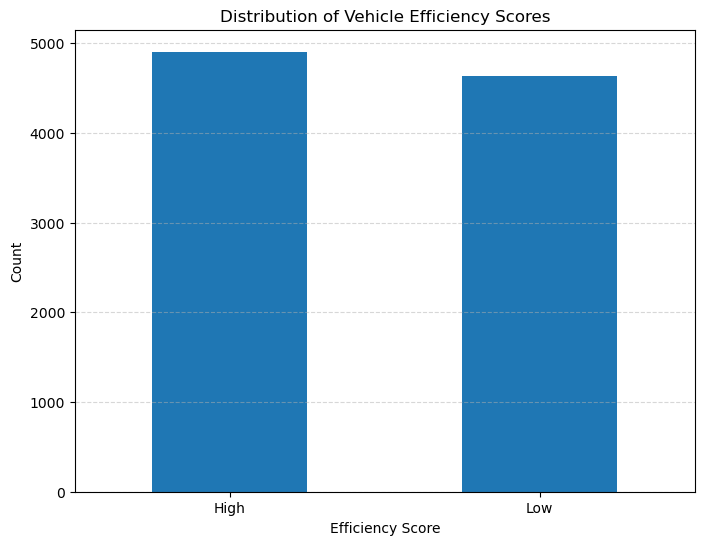

In [69]:
# Create bar plot of efficiency score distribution
plt.figure(figsize=(8, 6))
efficiency_counts = ev_main_merged_efficiency__df["Efficiency_Score"].value_counts()
efficiency_counts.plot(kind="bar")
plt.title("Distribution of Vehicle Efficiency Scores")
plt.xlabel("Efficiency Score")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [70]:
ev_main_merged_efficiency__df.head()

,Brand,Model,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Launch_Date,Date,Sales,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance,Efficiency_Score
0,Ford,F-150 Lightning,268.0,60121.52,28.63,0.10,2.26,59.59,7,2020-09-01,2020-09-01,35,0.37,0.24,0.01,High
1,Lucid,Air,266.0,56169.00,36.95,1.15,2.11,49.47,5,2018-06-30,2018-06-30,27,0.37,0.31,0.01,High
2,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2019-07-30,Missing,32,0.29,0.29,0.01,Low
3,Ford,Mach-E,287.0,59811.91,33.38,9.20,2.19,47.57,5,2017-03-08,2017-03-08,75,0.35,0.25,0.01,High
4,Nissan,Leaf,263.0,61635.17,15.58,9.42,1.17,49.60,5,2017-12-13,2017-12-13,107,0.29,0.29,0.01,Low


#### _Task No. 4.4.2 => Apply a custom function to calculate a 'Value_Score' as (Range * Efficiency) / Price._


In [71]:
# Calculate Value Score as (Range * Efficiency) / Price
ev_main_merged_efficiency__df["Value_Score"] = (
    ev_main_merged_efficiency__df["Range"]
    * ev_main_merged_efficiency__df["Efficiency"]
    / ev_main_merged_efficiency__df["Price"]
)

# Display first few rows to verify new column
print("\nFirst few rows with Value Score:")
ev_main_merged_efficiency__df[
    ["Model", "Range", "Efficiency", "Price", "Value_Score"]
].head()


First few rows with Value Score:


,Model,Range,Efficiency,Price,Value_Score
0,F-150 Lightning,268.0,0.37,60121.52,0.001649
1,Air,266.0,0.37,56169.00,0.001752
2,Leaf,263.0,0.29,61635.17,0.001237
3,Mach-E,287.0,0.35,59811.91,0.001679
4,Leaf,263.0,0.29,61635.17,0.001237


#### _Task No. 4.5.1 => Create a pivot table showing average price by Brand and Efficiency_Score._


In [72]:
# Create pivot table of average price by Brand and Efficiency_Score

""" 
The "mean" aggregation function has been applied on the "Price" column and been categorized based on the "Efficiency_Score" for each "Brand"."""

pivot_price_efficiency = pd.pivot_table(
    ev_main_merged_efficiency__df,
    index="Brand",
    values="Price",
    aggfunc="mean",
    columns="Efficiency_Score",
)

# Display the pivot table
print("\nAverage Price by Brand and Efficiency Score:")
print(pivot_price_efficiency)


Average Price by Brand and Efficiency Score:
Efficiency_Score          High           Low
Brand                                       
Audi                       NaN  60150.779310
BMW               62657.810000  59324.290000
Chevrolet         59656.330000  59269.180000
Ford              59968.323364           NaN
Hyundai                    NaN  59881.254574
Jaguar                     NaN  60894.550000
Kia               59903.031427           NaN
Lucid             56169.000000           NaN
Mercedes-Benz     60630.780000  60402.400000
Nissan                     NaN  61140.886923
Rivian            60736.870000           NaN
Tesla             59672.036776  60193.280000
Volkswagen        59783.720000  60210.690000
Volvo             61473.430000           NaN


#### _Task No. 4.5.2 => Melt the DataFrame to create a "long" format for Range, Price, and Sales._




In [73]:
get_columns_list(ev_main_merged_efficiency__df)

['Brand',
 'Model',
 'Range',
 'Price',
 'Battery_Capacity',
 'Charging_Speed',
 'Acceleration',
 'Top_Speed',
 'Seating_Capacity',
 'Launch_Date',
 'Date',
 'Sales',
 'Efficiency',
 'Drag_Coefficient',
 'Tire_Rolling_Resistance',
 'Efficiency_Score',
 'Value_Score']

In [74]:
# Melt the DataFrame to create long format for Range, Price, and Sales

""" 
In our example let's say we're dealing with multiple columns like "Brand", "Model", "Range", "Price", "Sales".

If we want "Range", "Price", "Sales" to not be separate column and be labelled under a single column name suppose "Metric", then we can  pd.melt() method to `melt` the selected columns.

This will make the column names "Range", "Price", "Sales" melt as values in the "Metric" column.

The actual values that the melted columns held will now be added to their corresponding column named "Value" of the respective row. """

melted_df = pd.melt(
    ev_main_merged_efficiency__df,
    id_vars=["Brand", "Model"],  # Keep these as identifier columns
    value_vars=["Range", "Price", "Sales"],  # Columns to melt
    var_name="Metric",  # Name for the new column containing original column names
    value_name="Value",  # Name for the new column containing values
)

# Display the first few rows of the melted DataFrame
print("\nMelted DataFrame (long format):")
melted_df


Melted DataFrame (long format):


,Brand,Model,Metric,Value
0,Ford,F-150 Lightning,Range,268.0
1,Lucid,Air,Range,266.0
2,Nissan,Leaf,Range,263.0
3,Ford,Mach-E,Range,287.0
4,Nissan,Leaf,Range,263.0
...,...,...,...,...
28627,Rivian,R1T,Sales,26.0
28628,Audi,Q4 e-tron,Sales,20.0
28629,Lucid,Air,Sales,129.0
28630,Lucid,Air,Sales,160.0


---
### TASK NO. 5: WORKING WITH VECTORS


#### _Task No. 5.1 => Extract 'Range' and 'Price' columns as NumPy arrays._


In [76]:
range_series = ev_main_merged_efficiency__df["Range"]
price_series = ev_main_merged_efficiency__df["Price"]

In [77]:
print("\nRange array:")
print(type(range_series))
# print(range_series)

print("\nPrice array:")
print(type(range_series))
# print(range_series)


Range array:
<class 'pandas.core.series.Series'>

Price array:
<class 'pandas.core.series.Series'>


In [78]:
""" 
When the "to_numpy()" method is called on a pandas Series, it converts the Series into a NumPy array.
We can confirm the successful conversion from Series to Numpy Array by comparing the data types."""

range_array = range_series.to_numpy()
price_array = price_series.to_numpy()

In [79]:
print("\nRange array:")
print(type(range_array))
print(range_array)

print("\nPrice array:")
print(type(price_array))
print(price_array)


Range array:
<class 'numpy.ndarray'>
[268. 266. 263. ... 266. 266. 266.]

Price array:
<class 'numpy.ndarray'>
[60121.52 56169.   61635.17 ... 56169.   56169.   56169.  ]


#### _Task No. 5.2 => Calculate the correlation coefficient between range and price._


In [80]:
# Calculate correlation coefficient between range and price using numpy's corrcoef
correlation_coefficient = np.corrcoef(range_array, price_array)[0, 1]

print("Correlation coefficient between Range and Price:", correlation_coefficient)

Correlation coefficient between Range and Price: -0.04737685155765471


#### _Task No. 5.3 => Perform element-wise operations on these vectors (e.g., calculating price per mile of range)._


In [81]:
# Calculate price per mile of range
price_per_mile = price_array / range_array

print("Price per mile of range:")
print(price_per_mile)

# Calculate some basic statistics
avg_price_per_mile = np.mean(price_per_mile)
min_price_per_mile = np.min(price_per_mile)
max_price_per_mile = np.max(price_per_mile)

print(f"\nAverage price per mile: {avg_price_per_mile:.2f}")
print(f"Minimum price per mile: {min_price_per_mile:.2f}")
print(f"Maximum price per mile: {max_price_per_mile:.2f}")

Price per mile of range:
[224.33402985 211.16165414 234.35425856 ... 211.16165414 211.16165414
 211.16165414]

Average price per mile: 206.85
Minimum price per mile: 174.48
Maximum price per mile: 245.76


---
### Task No. 6: Exploratory Data Analysis (EDA) with Pandas.


#### _Task No. 6.1 => Generate descriptive statistics using describe(). Interpret the results._


In [82]:
print("Descriptive statistics for the main dataframe:")
ev_main__df.describe()

Descriptive statistics for the main dataframe:


,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Sales
count,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000
mean,293.255029,60105.486640,31.300321,13.327901,1.794208,40.912127,4.906433,89.862741
std,27.951211,1184.605519,5.184810,10.294151,0.366158,12.368466,0.948172,44.955782
min,245.000000,56169.000000,15.580000,0.010000,0.870000,8.390000,2.000000,10.000000
25%,268.000000,59633.880000,28.080000,4.550000,1.660000,32.300000,5.000000,51.000000
50%,287.000000,60210.690000,31.300000,12.060000,1.850000,40.870000,5.000000,91.000000
75%,316.000000,60666.360000,34.300000,22.200000,2.020000,50.150000,5.000000,118.000000
max,340.000000,62657.810000,41.830000,36.190000,2.330000,59.590000,7.000000,293.000000


1. **Range**
- _Interpretation:_ Average range of 293 miles, with a variation between 245 to 340 miles.
- _Decision:_ Recommend models based on customer driving needs—city driving can work with lower ranges, while higher ranges are for long-distance travel.

2. **Price**
- _Interpretation:_ Average price around $60,000, with a narrow range between $56,169 to $62,657.
- _Decision:_ Focus on affordability for entry-level buyers and premium models for those seeking high-end features or longer ranges.

3. **Battery Capacity**
- _Interpretation:_ Average capacity is 31.3 kWh, ranging from 15.58 kWh to 41.83 kWh.
- _Decision:_ Recommend higher capacity models for long-range needs, and compact models for those prioritizing cost over range.

4. **Charging Speed**
- _Interpretation:_ Average charging speed of 13.33 kW, with a large range (0.01 kW to 36.19 kW).
- _Decision:_ Emphasize fast-charging models for customers who need quick turnaround; guide users on the difference between home vs. fast charging.

5. **Acceleration**
- _Interpretation:_ Average acceleration time of 1.79 seconds (0-60 mph).
- _Decision:_ Recommend based on performance preference—fast acceleration for sports enthusiasts or typical acceleration for mainstream consumers.

6. **Top Speed**
- _Interpretation:_ Average top speed of 40.91 mph, with a range between 8.39 mph to 59.59 mph.
- _Decision:_ Highlight top speed for buyers needing high-performance vehicles; urban buyers may not prioritize this feature.

7. **Seating Capacity**
- _Interpretation:_ Average of 4.91 seats, with a range of 2 to 7 seats.
- _Decision:_ Recommend larger models for families, while compact models suit individual or couple use.

8. **Sales**
- _Interpretation:_ Average sales of 89.86 units, ranging from 10 to 293 units.
- _Decision:_ Identify features driving high sales and target similarly-featured models for broader appeal.

In [83]:
print("Descriptive statistics for the main dataframe:")
ev_efficiency__df.describe()

Descriptive statistics for the main dataframe:


,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance
count,25.000000,25.000000,2.500000e+01
mean,0.313600,0.275200,1.000000e-02
std,0.062642,0.038527,1.770495e-18
min,0.210000,0.220000,1.000000e-02
25%,0.260000,0.250000,1.000000e-02
50%,0.340000,0.270000,1.000000e-02
75%,0.360000,0.310000,1.000000e-02
max,0.400000,0.350000,1.000000e-02


1. **Efficiency**
- _Interpretation:_ Average efficiency is 0.3136, with values ranging from 0.21 to 0.4.
- _Decision:_ Focus on improving efficiency for better energy usage, as higher efficiency models (closer to 0.4) provide better overall performance and range.

2. **Drag Coefficient**
- _Interpretation:_ The mean drag coefficient is 0.2752, ranging from 0.22 to 0.35.
- _Decision:_ Recommend models with lower drag coefficients for better aerodynamics and energy efficiency. Lower values reduce air resistance, improving range.

3. **Tire Rolling Resistance**
- _Interpretation:_ All values are constant at 0.01, with no variability.
- _Decision:_ As tire rolling resistance does not vary, it is not a primary focus for improvement. Standardize tire specifications across models for consistent performance.

In [84]:
print("Descriptive statistics for the main dataframe:")
ev_manufacturing__df.describe()

Descriptive statistics for the main dataframe:


,Annual_Production_Capacity,Year_Operations_Started
count,15.000000,15.000000
mean,267193.600000,2005.200000
std,140557.624544,9.922557
min,72981.000000,1991.000000
25%,160024.000000,1997.500000
50%,249890.000000,2002.000000
75%,360531.000000,2014.500000
max,498290.000000,2020.000000


1. **Annual Production Capacity**
- _Interpretation:_ Average production capacity is 267,193 units, with a range from 72,981 to 498,290 units.
- _Decision:_ Focus on scaling production for high-demand models (closer to the max production capacity), while smaller-scale models might need improvement in their production efficiency.

2. **Year Operations Started**
- _Interpretation:_ Operations started on average in 2005, with a range from 1991 to 2020.
- _Decision:_ Emphasize newer operations (post-2000) for technological advancements, while older plants may require upgrades to stay competitive and efficient.

In [85]:
print("Descriptive statistics for the main dataframe:")
ev_main_merged_efficiency__df.describe()

Descriptive statistics for the main dataframe:


,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Sales,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance,Value_Score
count,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9.544000e+03,9544.000000
mean,293.255029,60105.486640,31.300321,13.327901,1.794208,40.912127,4.906433,89.862741,0.312797,0.275451,1.000000e-02,0.001526
std,27.951211,1184.605519,5.184810,10.294151,0.366158,12.368466,0.948172,44.955782,0.061121,0.037844,1.249066e-15,0.000327
min,245.000000,56169.000000,15.580000,0.010000,0.870000,8.390000,2.000000,10.000000,0.210000,0.220000,1.000000e-02,0.000977
25%,268.000000,59633.880000,28.080000,4.550000,1.660000,32.300000,5.000000,51.000000,0.260000,0.250000,1.000000e-02,0.001237
50%,287.000000,60210.690000,31.300000,12.060000,1.850000,40.870000,5.000000,91.000000,0.340000,0.270000,1.000000e-02,0.001582
75%,316.000000,60666.360000,34.300000,22.200000,2.020000,50.150000,5.000000,118.000000,0.360000,0.310000,1.000000e-02,0.001755
max,340.000000,62657.810000,41.830000,36.190000,2.330000,59.590000,7.000000,293.000000,0.400000,0.350000,1.000000e-02,0.002061


**1. Efficiency**
- _Interpretation:_ The efficiency column in the ev_main_merged_efficiency__df reflects the average energy consumption of each vehicle model, with values ranging from 0.21 to 0.4. This is combined with other vehicle metrics from ev_main__df such as range, price, and sales.
- _Decision:_ Models with higher efficiency (closer to 0.4) should be marketed for long-distance consumers, while lower efficiency models may be positioned as cost-effective or suited for urban use. Efficiency optimization can be a key selling point for eco-conscious buyers.

**2. Drag Coefficient**
- _Interpretation:_ The drag coefficient averages at 0.2752, with values between 0.22 and 0.35. This value impacts the aerodynamics and, in turn, the range and energy consumption of the vehicles.
- _Decision:_ For improved performance, manufacturers should prioritize reducing drag coefficients. Efficient aerodynamics (lower drag) correlates with better range, so models with lower drag coefficients can be promoted as high-performance, long-range vehicles.

**3. Annual Production Capacity**
- _Interpretation:_ The data reveals that production capacity varies significantly, from a low of 72,981 to a high of 498,290 units. This suggests differing levels of market focus across various EV models.
- _Decision:_ Focus on scaling the production of high-demand, high-efficiency models that perform well in the market. For less popular models, consider streamlining production or investing in boosting demand through incentives.

**4. Price**
- _Interpretation:_ By merging efficiency data, price correlations may emerge, showing how higher efficiency vehicles are priced compared to less efficient ones.
- _Decision:_ Highlight cost-effectiveness for consumers in the market for lower-priced vehicles, while positioning high-efficiency models at premium price points due to their longer range and operational cost savings.

**5. Range**
- _Interpretation:_ The range column, when merged with efficiency data, can provide a clearer understanding of how range correlates with energy consumption. For example, higher efficiency models will often have a better range.
- _Decision:_ Recommend high-efficiency models for customers who prioritize long-range driving. Conversely, for those who are cost-sensitive but do not need extensive range, lower-efficiency models might be appropriate. Models with excellent range efficiency should be marketed as long-distance travel vehicles.

**6. Seating Capacity**
- _Interpretation:_ When looking at the relationship between seating capacity and efficiency, it’s possible to draw conclusions about consumer preferences for both space and efficiency.
- _Decision:_ For families or larger groups, offer high-efficiency vehicles with greater seating capacity (e.g., models with more than 5 seats). For individuals or small households, recommend more compact, efficient models.

**7. Sales**
- _Interpretation:_ The sales data can be analyzed alongside efficiency and range to determine whether customers are prioritizing fuel efficiency over other factors like price or features.
- _Decision:_ Focus marketing efforts on high-efficiency models that have shown high sales potential, while exploring ways to boost sales for lower-efficiency models by emphasizing affordability or unique features.

In summary, merging ev_main__df with ev_efficiency__df allows for deeper insights into how vehicle specifications, such as range, price, and efficiency, interact. These relationships can help tailor marketing strategies and improve product development based on consumer behavior and preferences.

In [86]:
print("Descriptive statistics for the main dataframe:")
ev_main_merged_efficiency_merged_manufacturing__df.describe()

Descriptive statistics for the main dataframe:


,Range,Price,Battery_Capacity,Charging_Speed,Acceleration,Top_Speed,Seating_Capacity,Sales,Efficiency,Drag_Coefficient,Tire_Rolling_Resistance,Annual_Production_Capacity,Year_Operations_Started
count,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9.544000e+03,9544.000000,9544.000000
mean,293.255029,60105.486640,31.300321,13.327901,1.794208,40.912127,4.906433,89.862741,0.312797,0.275451,1.000000e-02,287320.141555,2004.620704
std,27.951211,1184.605519,5.184810,10.294151,0.366158,12.368466,0.948172,44.955782,0.061121,0.037844,1.249066e-15,137113.960689,9.630113
min,245.000000,56169.000000,15.580000,0.010000,0.870000,8.390000,2.000000,10.000000,0.210000,0.220000,1.000000e-02,72981.000000,1991.000000
25%,268.000000,59633.880000,28.080000,4.550000,1.660000,32.300000,5.000000,51.000000,0.260000,0.250000,1.000000e-02,169318.000000,1997.000000
50%,287.000000,60210.690000,31.300000,12.060000,1.850000,40.870000,5.000000,91.000000,0.340000,0.270000,1.000000e-02,291315.000000,2002.000000
75%,316.000000,60666.360000,34.300000,22.200000,2.020000,50.150000,5.000000,118.000000,0.360000,0.310000,1.000000e-02,378616.000000,2014.000000
max,340.000000,62657.810000,41.830000,36.190000,2.330000,59.590000,7.000000,293.000000,0.400000,0.350000,1.000000e-02,498290.000000,2020.000000


**1. Annual Production Capacity vs. Efficiency**
- _Interpretation:_ Higher production capacities often correlate with more efficient manufacturing techniques and modern designs, leading to better efficiency in vehicles.
- _Decision:_ Manufacturers with large capacities should focus on producing efficient vehicles for cost-effective and eco-friendly mass-market segments.

**2. Year Operations Started vs. Efficiency**
- _Interpretation:_ Newer operations may reflect modern technologies and practices for greater efficiency compared to older plants.
- _Decision:_ Manufacturers with newer operations should promote high-efficiency models, while older plants might focus on more cost-effective but less efficient vehicles.

**3. Drag Coefficient and Annual Production Capacity**
- _Interpretation:_ Manufacturers with larger production capacities might focus on optimizing aerodynamics (lower drag coefficients).
- _Decision:_ Efforts should be made to improve aerodynamics for higher-volume models to increase efficiency.

**4. Price vs. Manufacturing Capacity**
- _Interpretation:_ Higher production capacities may allow for more competitive pricing due to economies of scale.
- _Decision:_ Focus pricing strategies on high-efficiency models for mass-market customers while maintaining value for money.

**5. Seating Capacity vs. Manufacturing Location**
- _Interpretation:_ Regional demand and manufacturing location often influence vehicle types, with larger seating capacity vehicles more prevalent in family-oriented markets.
- _Decision:_ Manufacturers should tailor their production to regional preferences for more efficient family vehicles.

**6. Sales vs. Manufacturing Location and Capacity**
- _Interpretation:_ Higher manufacturing capacities and local production strengths often correlate with successful sales.
- _Decision:_ Focus sales and distribution in regions where local manufacturing is strongest, especially for models with high efficiency.

**7. Sales vs. Efficiency and Production Capacity**
- _Interpretation:_ High-efficiency vehicles with scalable production capacities are more likely to attract consumers due to lower operating costs.
- _Decision:_ Emphasize efficient models in marketing campaigns to maximize sales, particularly in markets with growing demand for eco-friendly vehicles.
This approach offers a clear and actionable understanding of the relationship between vehicle specifications, manufacturing capabilities, and consumer demand in the merged dataset.

#### _Task No. 6.2.1 => Create visualizations: Scatter plot of Range vs Price._

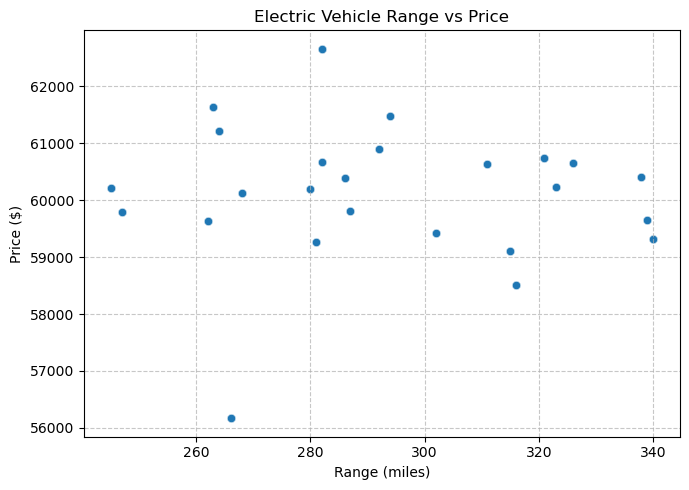

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=ev_main_merged_efficiency_merged_manufacturing__df,
    x="Range",
    y="Price",
    alpha=0.6,
)

plt.title("Electric Vehicle Range vs Price")
plt.xlabel("Range (miles)")
plt.ylabel("Price ($)")

plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**6.2.1: Scatter Plot of Range vs. Price**
- _**Business Problem:**_ Understand the pricing strategy relative to vehicle range to optimize value propositions.
- _**Objective:**_ Identify models with the best range-to-price ratio to target budget-conscious customers effectively.

#### _Task No. 6.2.2 => Create visualizations: Bar plot of average Efficiency by Brand._

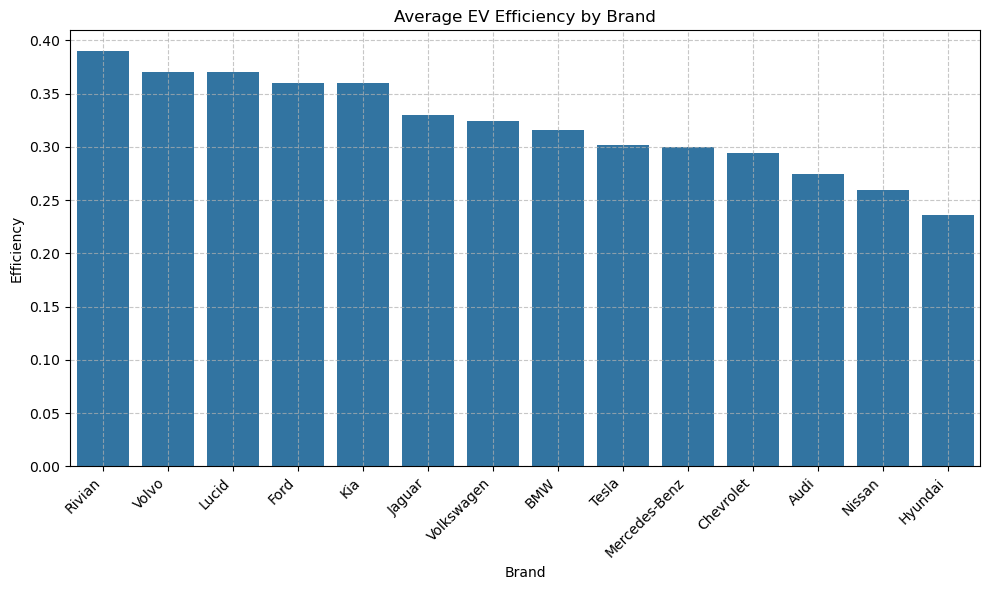

In [88]:
plt.figure(figsize=(10, 6))

# Calculate mean efficiency by brand
brand_efficiency = (
    ev_main_merged_efficiency_merged_manufacturing__df.groupby("Brand")["Efficiency"]
    .mean()
    .sort_values(ascending=False)
)

# Create bar plot
sns.barplot(x=brand_efficiency.index, y=brand_efficiency.values)

plt.title("Average EV Efficiency by Brand")
plt.xlabel("Brand")
plt.ylabel("Efficiency")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**6.2.2: Bar Plot of Average Efficiency by Brand**
- _**Business Problem:**_ Assess how different brands fare in terms of efficiency.
- _**Objective:**_ Highlight competitive advantages and gaps in efficiency to guide marketing and product improvement efforts.

#### _Task No. 6.2.3 => Create visualizations: Box plot of Price distribution by Brand._

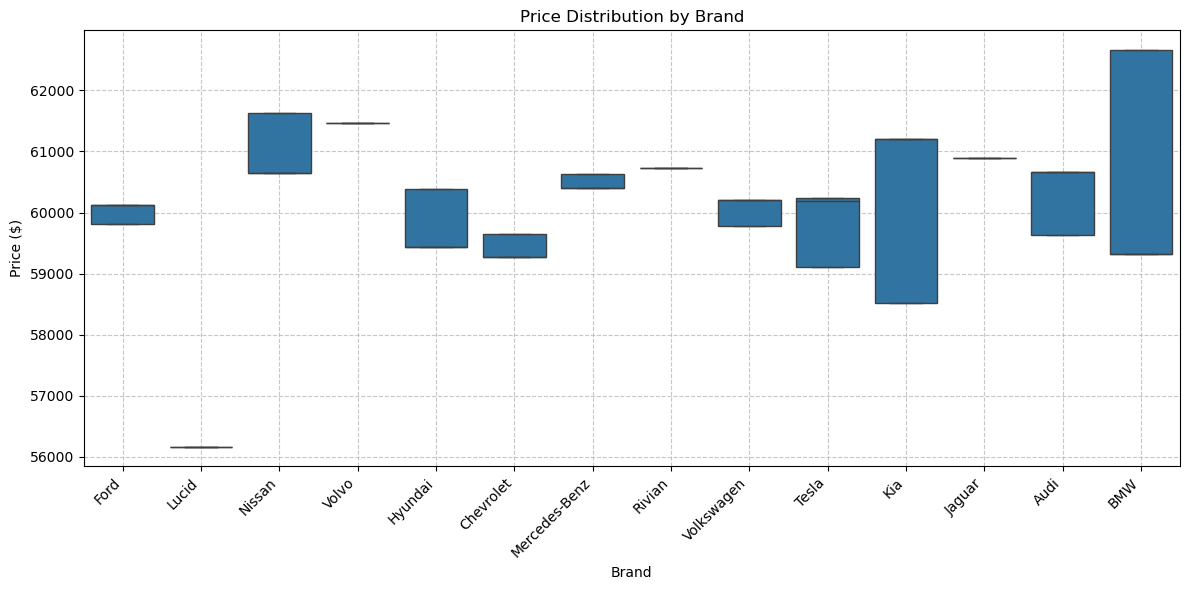

In [89]:
plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(
    data=ev_main_merged_efficiency_merged_manufacturing__df,
    x="Brand",
    y="Price",
)

plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price ($)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**6.2.3: Box Plot of Price Distribution by Brand**
- _**Business Problem:**_ Analyze pricing strategies across brands to position offerings effectively in the market.
- _**Objective:**_ Identify outliers and assess brand competitiveness in various price segments.

#### _Task No. 6.2.4 => Create visualizations: Pie chart of market share based on Sales._

In [90]:
ev_market_share__df = pd.read_csv("data/raw_files/ev_market_share.csv")

In [91]:
ev_market_share__df["Market_Share"] = ev_market_share__df["Market_Share"].round(3)

ev_market_share__df.to_csv(
    "data/cleaned_files/ev_market_share__cleaned.csv", index=False
)



     Year          Brand  Market_Share  Total_Market_Size
0    2015          Tesla         0.059            4204829
1    2015         Nissan         0.195            4204829
2    2015      Chevrolet         0.032            4204829
3    2015            BMW         0.120            4204829
4    2015           Ford         0.070            4204829
..    ...            ...           ...                ...
130  2023         Rivian         0.004            4123074
131  2023          Lucid         0.004            4123074
132  2023       Polestar         0.005            4123074
133  2023  Mercedes-Benz         0.020            4123074
134  2023          Volvo         0.104            4123074

[135 rows x 4 columns]


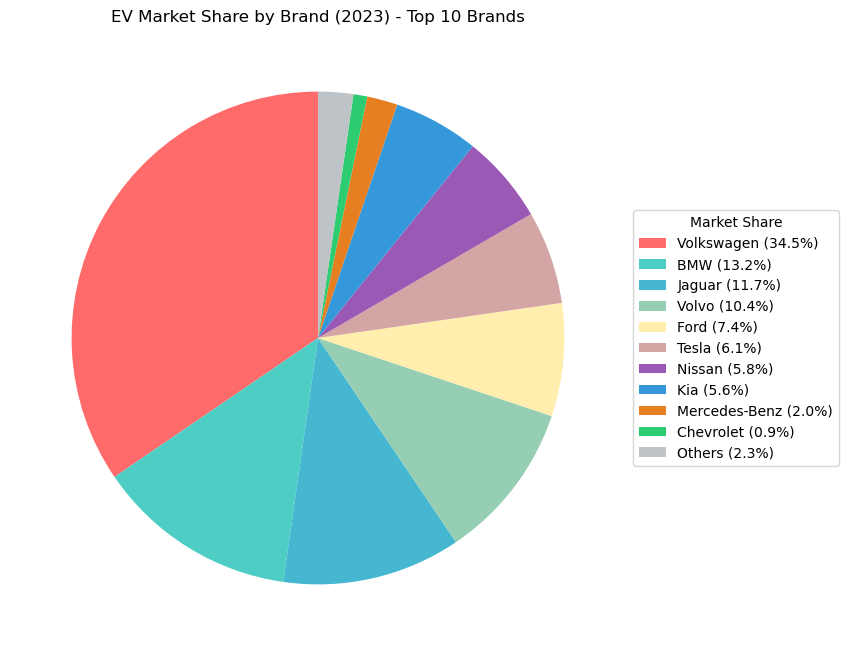

In [92]:
# Display the cleaned market share data
print("\n")
print(ev_market_share__df)

# Create pie chart of market share by brand for most recent year (2023)
plt.figure(figsize=(10, 8))

# Define custom colors
colors = [
    "#FF6B6B",
    "#4ECDC4",
    "#45B7D1",
    "#96CEB4",
    "#FFEEAD",
    "#D4A5A5",
    "#9B59B6",
    "#3498DB",
    "#E67E22",
    "#2ECC71",
    "#BDC3C7",
]

# Filter for 2023 data
market_share_2023 = ev_market_share__df[ev_market_share__df["Year"] == 2023]

# Sort by market share and get top 10 brands
top_10_brands = market_share_2023.nlargest(10, "Market_Share")

# Calculate market share for remaining brands
others_share = market_share_2023[
    ~market_share_2023["Brand"].isin(top_10_brands["Brand"])
]["Market_Share"].sum()

# Create new dataframe with top 10 and others
plot_data = pd.concat(
    [
        top_10_brands,
        pd.DataFrame(
            {
                "Year": [2023],
                "Brand": ["Others"],
                "Market_Share": [others_share],
                "Total_Market_Size": [market_share_2023["Total_Market_Size"].iloc[0]],
            }
        ),
    ]
)

# Create pie chart without labels
patches, texts = plt.pie(
    plot_data["Market_Share"],
    colors=colors,
    startangle=90,
)

# Add legend with percentages
percentages = [f"{x:.1f}%" for x in (plot_data["Market_Share"] * 100)]
plt.legend(
    patches,
    [f"{l} ({p})" for l, p in zip(plot_data["Brand"], percentages)],
    title="Market Share",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

plt.title("EV Market Share by Brand (2023) - Top 10 Brands")

plt.show()

**6.2.4: Pie Chart of Market Share Based on Sales**
- _**Business Problem:**_ Measure brand dominance and identify market leaders.
- _**Objective:**_ Focus resources on competitive strategies or alliances for brands with lower shares.

---
### Task No. 7 => Advanced Analysis.

#### _Task No. 7.1 => Group the data by Brand and Manufacturing_Location, then calculate mean Range, Price, and Efficiency._

In [110]:
# Group by Brand and Manufacturing Location and calculate means
location_metrics = (
    ev_main_merged_efficiency_merged_manufacturing__df.groupby(
        ["Brand", "Primary_Manufacturing_Location", "Secondary_Manufacturing_Location"]
    )[["Range", "Price", "Efficiency"]]
    .mean()
    .reset_index()
)

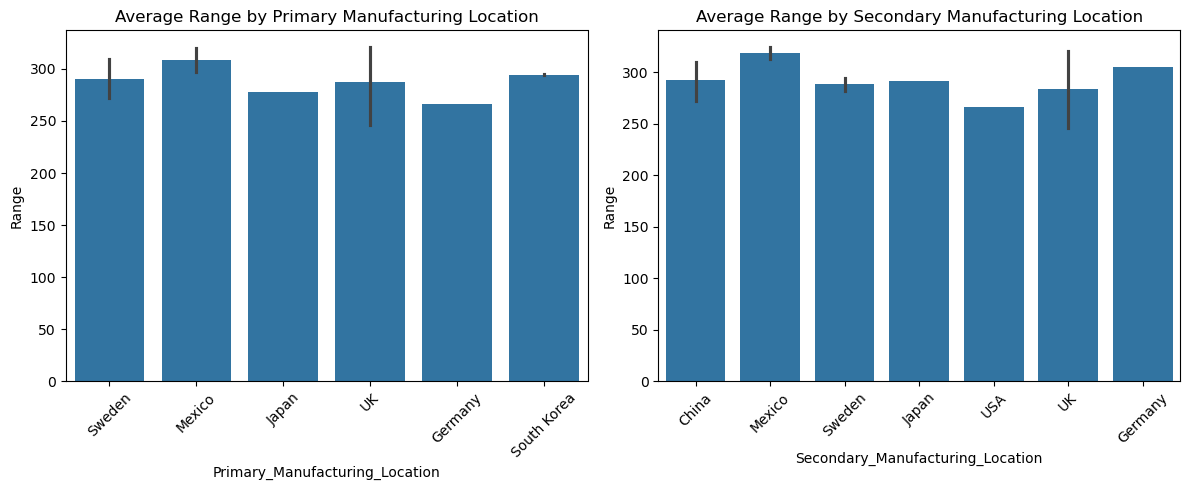

In [114]:
# Plot Range by Manufacturing Location
plt.figure(figsize=(12, 5))

# Create subplot for Primary Location
plt.subplot(1, 2, 1)
sns.barplot(data=location_metrics, x="Primary_Manufacturing_Location", y="Range")
plt.title("Average Range by Primary Manufacturing Location")
plt.xticks(rotation=45)

# Create subplot for Secondary Location
plt.subplot(1, 2, 2)
sns.barplot(data=location_metrics, x="Secondary_Manufacturing_Location", y="Range")
plt.title("Average Range by Secondary Manufacturing Location")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

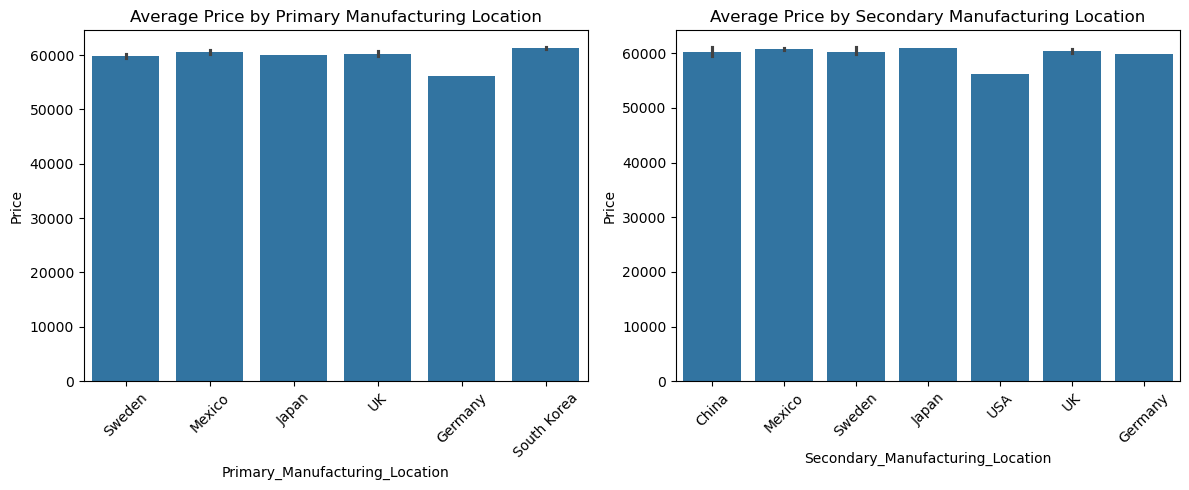

In [115]:
# Plot Range by Manufacturing Location
plt.figure(figsize=(12, 5))

# Create subplot for Primary Location
plt.subplot(1, 2, 1)
sns.barplot(data=location_metrics, x="Primary_Manufacturing_Location", y="Price")
plt.title("Average Price by Primary Manufacturing Location")
plt.xticks(rotation=45)

# Create subplot for Secondary Location
plt.subplot(1, 2, 2)
sns.barplot(data=location_metrics, x="Secondary_Manufacturing_Location", y="Price")
plt.title("Average Price by Secondary Manufacturing Location")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

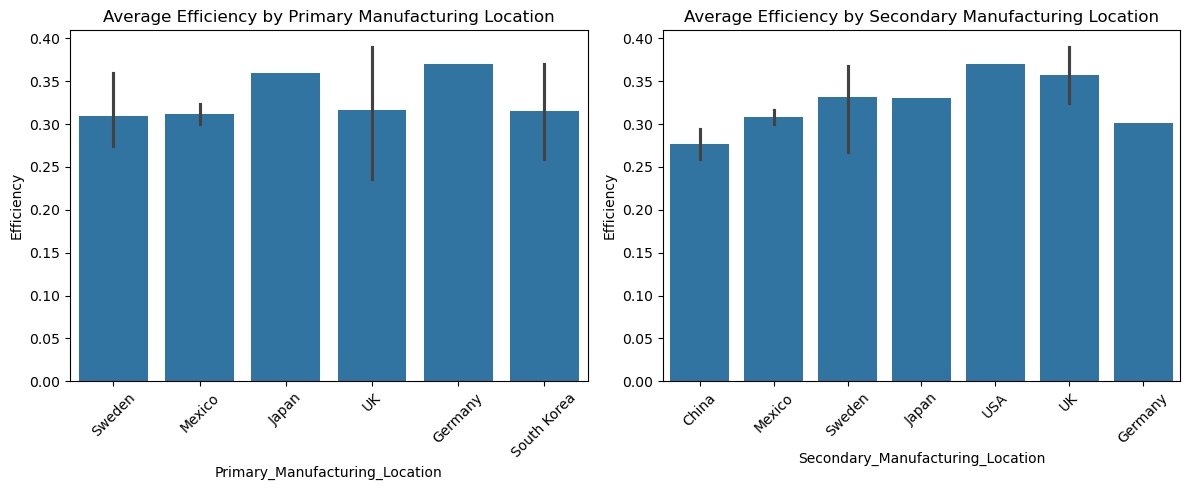

In [116]:
# Plot Range by Manufacturing Location
plt.figure(figsize=(12, 5))

# Create subplot for Primary Location
plt.subplot(1, 2, 1)
sns.barplot(data=location_metrics, x="Primary_Manufacturing_Location", y="Efficiency")
plt.title("Average Efficiency by Primary Manufacturing Location")
plt.xticks(rotation=45)

# Create subplot for Secondary Location
plt.subplot(1, 2, 2)
sns.barplot(data=location_metrics, x="Secondary_Manufacturing_Location", y="Efficiency")
plt.title("Average Efficiency by Secondary Manufacturing Location")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**7.1: Bar Plot for Comparative Study by Manufacturing Location**
- _**Business Problem:**_ Explore the impact of manufacturing location on performance metrics like range, price, and efficiency.
- _**Objective:**_ Identify strategic locations that maximize production efficiency and customer satisfaction.

#### _Task No. 7.2 => Use `pd.cut()` to bin the 'Price' into categories (Budget, Mid-range, Luxury). Analyze the distribution of these categories across Brands._

In [117]:
# Create price categories

ev_main__df["Price_Category"] = pd.cut(
    ev_main__df["Price"],
    bins=[
        ev_main__df["Price"].min() - 1,
        58000,
        60000,
        ev_main__df["Price"].max(),
    ],
    labels=["Budget", "Mid-range", "Luxury"],
)

<Figure size 1200x600 with 0 Axes>

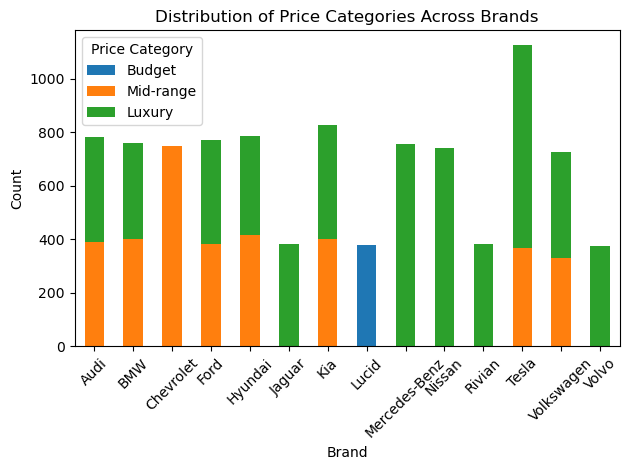

In [118]:
# Calculate brand distribution across price categories
brand_price_dist = pd.crosstab(ev_main__df["Brand"], ev_main__df["Price_Category"])

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
brand_price_dist.plot(kind="bar", stacked=True)
plt.title("Distribution of Price Categories Across Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Price Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

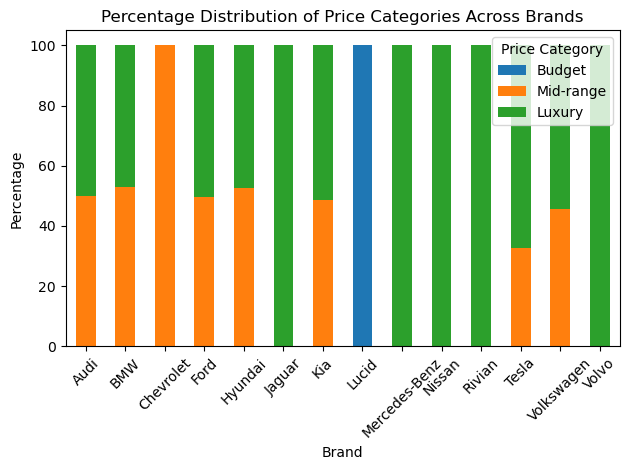

In [119]:
# Calculate percentage distribution
brand_price_pct = brand_price_dist.div(brand_price_dist.sum(axis=1), axis=0) * 100

# Create percentage stacked bar plot
plt.figure(figsize=(12, 6))
brand_price_pct.plot(kind="bar", stacked=True)
plt.title("Percentage Distribution of Price Categories Across Brands")
plt.xlabel("Brand")
plt.ylabel("Percentage")
plt.legend(title="Price Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7.2: Bar Plot for Price Categories Across Brands**
- _**Business Problem:**_ Understand brand positioning within budget, mid-range, and luxury segments.
- _**Objective:**_ Align product development and marketing strategies with customer preferences in each category.

#### _Task No. 7.3 => Identify the top 5 models based on the 'Value_Score' you created earlier._


In [120]:
# Get top 5 models by value score
top_5_value = (
    ev_main_merged_efficiency__df[["Brand", "Model", "Value_Score"]]
    .sort_values("Value_Score", ascending=False)
    .drop_duplicates()
    .head()
)

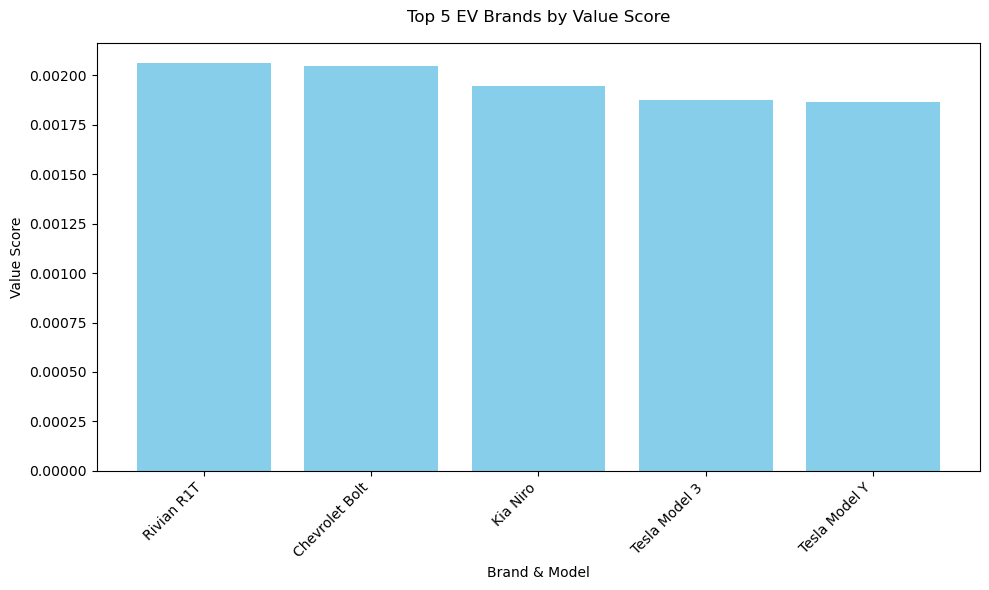

In [121]:
# Reset index for plotting
top_5_value = top_5_value.reset_index(drop=True)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    top_5_value["Brand"] + " " + top_5_value["Model"],
    top_5_value["Value_Score"],
    color="skyblue",
)

plt.title("Top 5 EV Brands by Value Score", fontsize=12, pad=15)
plt.xlabel("Brand & Model", fontsize=10)
plt.ylabel("Value Score", fontsize=10)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

**7.3: Bar Plot for Top 5 Models Based on Value Score**
- _**Business Problem:**_ Highlight high-performing models to focus marketing and sales strategies.
- _**Objective:**_ Optimize inventory and promotion for models with the highest perceived value.

#### _Task No. 7.4 => Calculate the percentage of High vs Low efficiency vehicles for each Brand._


<Figure size 1200x600 with 0 Axes>

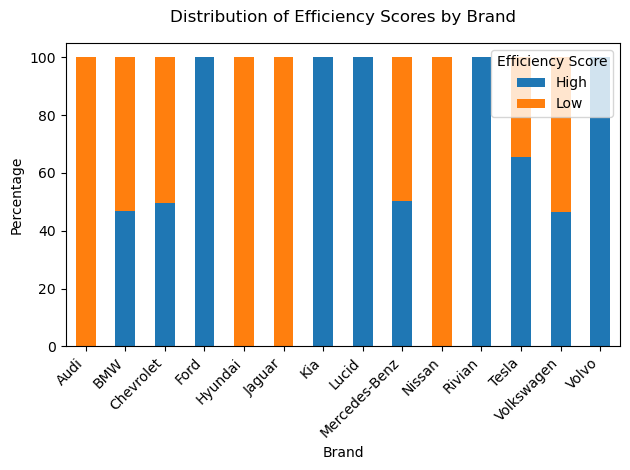

In [122]:
# Calculate percentage of High vs Low efficiency vehicles by brand
efficiency_by_brand = (
    pd.crosstab(
        ev_main_merged_efficiency__df["Brand"],
        ev_main_merged_efficiency__df["Efficiency_Score"],
        normalize="index",
    )
    * 100
)

# Create bar plot
plt.figure(figsize=(12, 6))
efficiency_by_brand.plot(kind="bar", stacked=True)

plt.title("Distribution of Efficiency Scores by Brand", fontsize=12, pad=15)
plt.xlabel("Brand", fontsize=10)
plt.ylabel("Percentage", fontsize=10)
plt.legend(title="Efficiency Score")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

**7.4: Bar Plot for High vs. Low Efficiency Vehicles by Brand**
- _**Business Problem:**_ Gauge the efficiency distribution within brand portfolios.
- _**Objective:**_ Guide product development to enhance the share of high-efficiency vehicles.

#### _Task No. 7.5 => Perform a time-based analysis if your dataset includes a date column. If not, create a hypothetical 'Launch_Date' column and analyze trends over time._


In [123]:
# Filter out records with "Missing" Launch_Date and convert to datetime
ev_main_merged_efficiency__df = ev_main_merged_efficiency__df[
    ev_main_merged_efficiency__df["Launch_Date"] != "Missing"
].copy()

ev_main_merged_efficiency__df["Launch_Date"] = pd.to_datetime(
    ev_main_merged_efficiency__df["Launch_Date"]
)

# Group by launch year and calculate mean efficiency and value scores
yearly_trends = (
    ev_main_merged_efficiency__df.groupby(
        ev_main_merged_efficiency__df["Launch_Date"].dt.year
    )
    .agg({"Efficiency": "mean", "Value_Score": "mean", "Sales": "mean"})
    .reset_index()
)

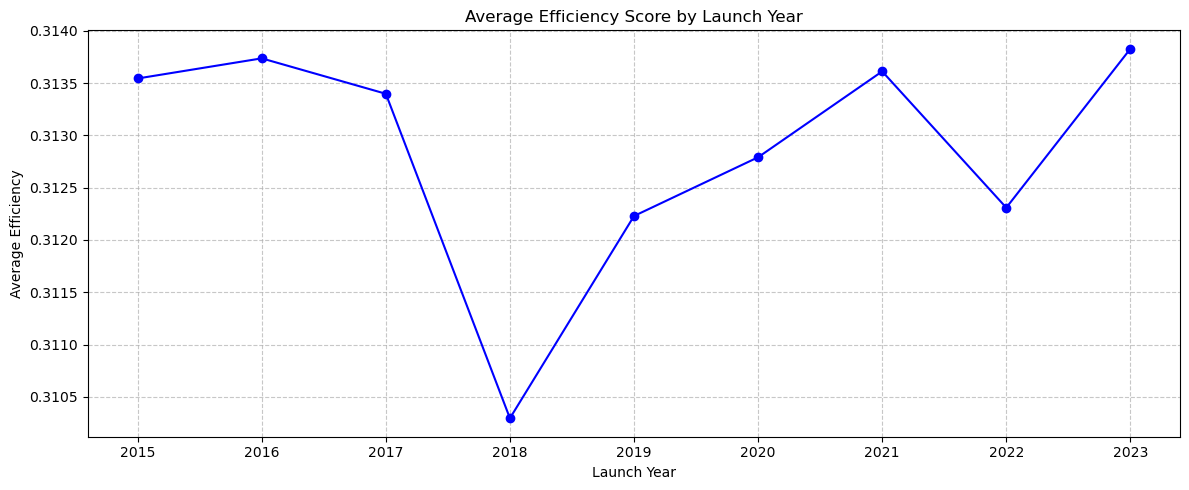

In [124]:
# Plot 1: Average Efficiency Over Time
plt.figure(figsize=(12, 5))
plt.plot(
    yearly_trends["Launch_Date"], yearly_trends["Efficiency"], marker="o", color="blue"
)
plt.title("Average Efficiency Score by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Efficiency")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

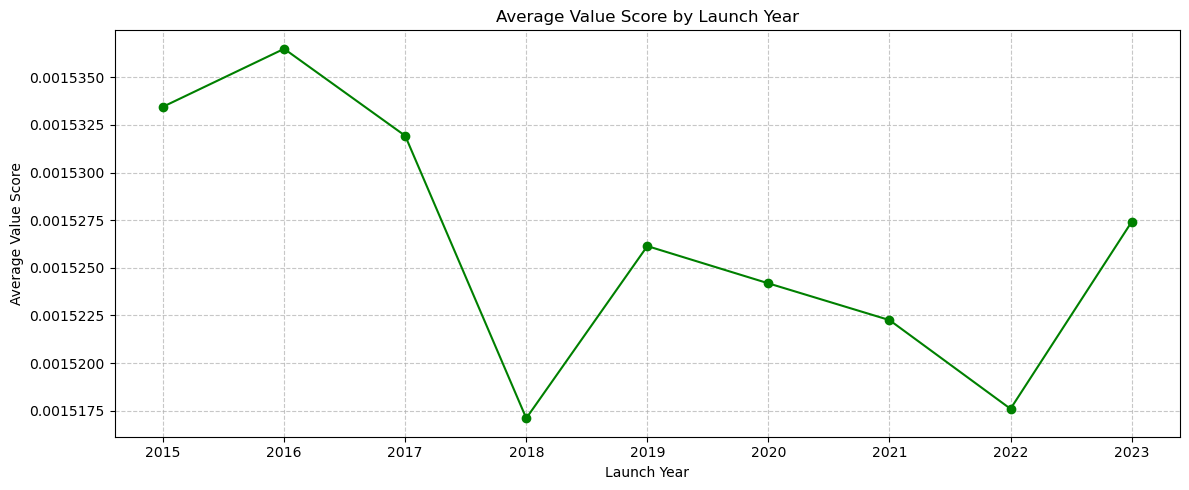

In [125]:
# Plot 2: Average Value Score Over Time
plt.figure(figsize=(12, 5))
plt.plot(
    yearly_trends["Launch_Date"],
    yearly_trends["Value_Score"],
    marker="o",
    color="green",
)
plt.title("Average Value Score by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Value Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

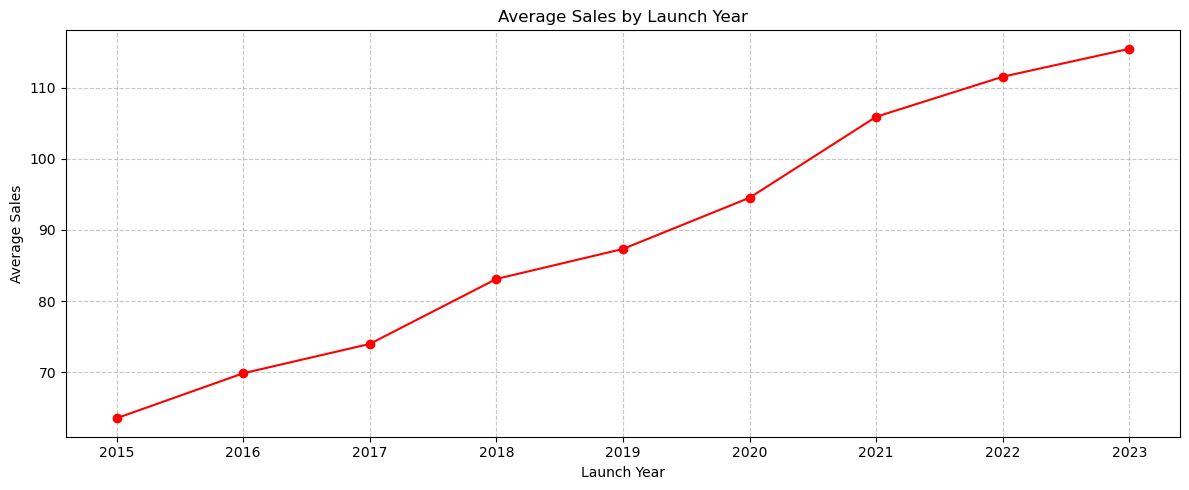

In [126]:
# Plot 3: Average Sales Over Time
plt.figure(figsize=(12, 5))
plt.plot(yearly_trends["Launch_Date"], yearly_trends["Sales"], marker="o", color="red")
plt.title("Average Sales by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Sales")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**7.5: Line Plot for Time-Based Trends**
- _**Business Problem:**_ Track market evolution over time and identify seasonal trends.
- _**Objective:**_ Plan product launches and promotional campaigns to align with demand peaks.

| Targetted Segments | Corresponding Visualizaions / Insights|
|--------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| _**Market and Competitor Analysis**_           | **[Figure 6.2.4]** Pie chart of market share based on Sales.                                                   |
| _**Consumer Behavior and Segmentation**_         | **[Figure 6.2.3]** Box plot of Price distribution by Brand.                                                    |
|                                            | **[Figure 7.2]** Bar plot of Price categories (Budget, Mid-range, Luxury) distribution across Brands.          |
|                                            | **[Figure 7.3]** Identify the top 5 models based on the 'Value_Score' you created earlier using the Bar plots. |
| _**Product Performance and Value Optimization**_ | **[Figure 6.2.1]** Scatter plot of Range vs Price.                                                             |
|                                            | **[Figure 6.2.1]** Top 5 models based on Value_Score.                                                          |
| _**Operational and Manufacturing Insights**_     | **[Figure 7.1]** Bar plot of mean Range, Price, and Efficiency by Manufacturing_Location.                      |
| _**Sustainability and Energy Efficiency**_       | **[Figure 6.2.2]** Bar plot of average Efficiency by Brand.                                                    |
|                                            | **[Figure 7.4]** Percentage of High vs Low efficiency vehicles.                                                |
| _**Strategic Growth and Planning**_              | **[Figure 7.5]** Time-based analysis of trends using hypothetical 'Launch_Date'.                               |